# Exploratory data analysis

## 1. Dataset description




## 2. Load the dataset

In [3]:
library(testthat)
library(MASS)
library(plotly)
library(htmlwidgets)
library(mice)
library(tidyverse)
library(plotly)
library(rjson)
library(htmlwidgets)

Warning message:
"package 'testthat' was built under R version 3.6.2"
Loading required package: ggplot2


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


Warning message:
"package 'mice' was built under R version 3.6.2"
Loading required package: lattice


Attaching package: 'mice'


The following objects are masked from 'package:base':

    cbind, rbind


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::complete() masks mice::complete()
x dplyr::filter()   masks plotly::filter(), stats

In [4]:
url <- "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series"
covid19_confirmed <- read_csv(paste(url, "/time_series_covid19_confirmed_global.csv?raw=true", sep = ""))
covid19_death <- read_csv(paste(url, "/time_series_covid19_deaths_global.csv?raw=true", sep = ""))

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.



In [5]:
gov_resp <- read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  CountryName = col_character(),
  CountryCode = col_character(),
  C1_Flag = col_logical(),
  C2_Flag = col_logical(),
  C3_Flag = col_logical(),
  C4_Flag = col_logical(),
  C6_Flag = col_logical(),
  C7_Flag = col_logical(),
  E1_Flag = col_logical(),
  M1_Wildcard = col_logical()
)

See spec(...) for full column specifications.



In [6]:
head(covid19_confirmed)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,996,1026,1092,1176,1279,1351,1463,1531,1703,1828
NA,Albania,41.1533,20.1683,0,0,0,0,0,0,...,562,584,609,634,663,678,712,726,736,750
NA,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649
NA,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,713,717,717,723,723,731,738,738,743,743
NA,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,25,25,25,25,26,27,27
NA,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,23,23,24,24,24,24,24,24,24


In [ ]:

#'
#'
get_data <- function(label, skip = 4){
    read_csv(paste("../data/raw_data/", label, sep = ""), skip = skip)
}

filenames <- fromJSON(file = "../data/clean_data/filenames.json")

age_65up <- get_data(filenames["age_65up"])
age_1564 <- get_data(filenames["age_1564"])
air_pollution <- get_data(filenames["air_pollution"])
medical_bed <- get_data(filenames["medical_bed"])
physicians <- get_data(filenames["physicians"])
nurses_midwives <- get_data(filenames["nurses_midwives"])
population_density <- get_data(filenames["population_density"])
population_total <- get_data(filenames["population_total"])
smoking <- get_data(filenames["smoking"])

In [ ]:
head(age_65up)
head(age_1564)
head(air_pollution)
head(medical_bed)
head(physicians)
head(nurses_midwives)
head(population_density)
head(population_total)
head(smoking)

In [9]:
head(gov_resp)

CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,NA,NA,0,0,0,0
Afghanistan,AFG,20200101,0,NA,0,NA,0,NA,NA,...,0,0,0,NA,0,0,0,0,0,0
Angola,AGO,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,NA,NA,0,0,0,0
Albania,ALB,20200101,0,NA,0,NA,0,NA,NA,...,0,0,0,NA,NA,NA,0,0,0,0
Andorra,AND,20200101,0,NA,0,NA,0,NA,NA,...,0,0,0,NA,NA,NA,0,0,0,0
United Arab Emirates,ARE,20200101,0,NA,0,NA,0,NA,NA,...,NA,NA,NA,NA,0,0,0,0,0,0


## 3. Explore the dataset

In [10]:
dim(covid19_confirmed)

[1] 264 102

In [11]:
colnames(covid19_confirmed)[length(covid19_confirmed)]

[1] "4/28/20"

In [12]:
dim(covid19_death)

[1] 264 102

In [13]:
colnames(covid19_death)[length(covid19_death)]

[1] "4/28/20"

In [14]:
length(unique(gov_resp$CountryName))

[1] 151

In [15]:
test_that("Column names of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(colnames(covid19_confirmed) == colnames(covid19_death)))
          })

In [16]:
test_that("The country column of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(covid19_confirmed[2] == covid19_death[2]))
          })

In [17]:
test_that("The last column of covid19_confirmed should not have missing values.",
          {expect_true(all(!is.na(covid19_confirmed[length(covid19_confirmed)])))
          })

In [18]:
test_that("The last column of covid19_death should not have missing values.",
          {expect_true(all(!is.na(covid19_death[length(covid19_death)])))
          })

## 4. Initial thoughts


## 5. Wrangling

In [19]:
#'
#'
clean_data <- function(df, name){
    colnames(df)[1] <- 'country' 
    ret <- df[c(-2, -3, -4)] %>%
        gather(year, {{name}}, -country) %>%
        drop_na() %>%
        group_by(country) %>%
        top_n(1, year) %>%
        ungroup() %>%
        mutate(country = case_when(country == 'Bahamas, The' ~ 'Bahamas',
                                   country == 'Brunei Darussalam' ~ 'Brunei',
                                   country == 'Egypt, Arab Rep.' ~ 'Egypt',
                                   country == 'Gambia, The' ~ 'Gambia',
                                   country == 'Iran, Islamic Rep.' ~ 'Iran',
                                   country == 'Korea, Dem. People’s Rep.' ~ 'South Korea',
                                   country == 'Czech Republic' ~ 'Czechia',
                                   country == 'Lao PDR' ~ 'Laos',
                                   country == 'Russian Federation' ~ 'Russia',
                                   country == 'St. Lucia' ~ 'Saint Lucia',
                                   country == 'St. Vincent and the Grenadines' ~ 'Saint Vincent and the Grenadines',
                                   country == 'Slovak Republic' ~ 'Slovakia',
                                   country == 'Syrian Arab Republic' ~ 'Syria',
                                   country == 'Venezuela, RB' ~ 'Venezuela',
                                   country == 'Sub-Saharan Africa' ~ 'Western Sahara',
                                   country == 'Yemen, Rep.' ~ 'Yemen',
                                   TRUE ~ country))
    colnames(ret)[2] <- paste("year_", name, sep="")
    ret
}

In [20]:
age_65up <- clean_data(age_65up, "age_65up")
age_1564 <- clean_data(age_1564, "age_1564")
air_pollution <- clean_data(air_pollution, "air_pollution")
medical_bed <- clean_data(medical_bed, "med_bed")
physicians <- clean_data(physicians, "physicians")
nurses_midwives <- clean_data(nurses_midwives, "nurses_midwives")
population_density <- clean_data(population_density, "pop_density")
population_total <- clean_data(population_total, "pop_total")
smoking <- clean_data(smoking, "smoking")

In [21]:
write_csv(age_65up, "../data/clean_data/age_65up_clean.csv")
write_csv(age_1564, "../data/clean_data/age_1564_clean.csv")
write_csv(air_pollution, "../data/clean_data/air_pollution_clean.csv")
write_csv(medical_bed, "../data/clean_data/medical_bed_clean.csv")
write_csv(physicians, "../data/clean_data/physicians_clean.csv")
write_csv(nurses_midwives, "../data/clean_data/nurses_midwives.csv")
write_csv(population_density, "../data/clean_data/population_density_clean.csv")
write_csv(population_total, "../data/clean_data/population_total_clean.csv")
write_csv(smoking, "../data/clean_data/smoking_clean.csv")

In [ ]:
age_65up <- read_csv("../data/clean_data/age_65up_clean.csv")
age_1564 <- read_csv("../data/clean_data/age_1564_clean.csv")
air_pollution <- read_csv("../data/clean_data/air_pollution_clean.csv")
medical_bed <- read_csv("../data/clean_data/medical_bed_clean.csv")
physicians <- read_csv("../data/clean_data/physicians_clean.csv")
nurses_midwives <- read_csv("../data/clean_data/nurses_midwives.csv")
population_density <- read_csv("../data/clean_data/population_density_clean.csv")
population_total <- read_csv("../data/clean_data/population_total_clean.csv")
smoking <- read_csv("../data/clean_data/smoking_clean.csv")

In [23]:
dim(age_65up)
dim(age_1564)
dim(air_pollution)
dim(medical_bed)
dim(physicians)
dim(nurses_midwives)
dim(population_density)
dim(population_total)
dim(smoking)

[1] 240   3

[1] 240   3

[1] 240   3

[1] 246   3

[1] 253   3

[1] 238   3

[1] 261   3

[1] 263   3

[1] 187   3

In [24]:
df_list <- list(population_total, age_65up, age_1564, air_pollution, medical_bed, 
                physicians, nurses_midwives, population_density, smoking)
country_data <- Reduce(function(left, right) merge(left, right, all = TRUE), df_list)

In [25]:
head(country_data)

country,year_pop_total,pop_total,year_age_65up,age_65up,year_age_1564,age_1564,year_air_pollution,air_pollution,year_med_bed,med_bed,year_physicians,physicians,year_nurses_midwives,nurses_midwives,year_pop_density,pop_density,year_smoking,smoking
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2018,37172386,2018,2.584927,2018,54.32490,2017,56.91081,2015,0.5,2016,0.2840,2014,0.3200,2018,56.93776,NA,NA
Albania,2018,2866376,2018,13.744736,2018,68.58239,2017,18.20060,2013,2.9,2016,1.1998,2016,3.5998,2018,104.61226,2016,28.7
Algeria,2018,42228429,2018,6.362497,2018,63.48882,2017,38.88401,2015,1.9,2016,1.8300,2016,2.2400,2018,17.73008,2016,15.6
American Samoa,2018,55465,NA,NA,NA,NA,2017,12.47382,NA,NA,1999,0.7810,NA,NA,2018,277.32500,NA,NA
Andorra,2018,77006,NA,NA,NA,NA,2017,10.30762,2009,2.5,2015,3.3333,2015,4.0128,2018,163.84255,2016,33.5
Angola,2018,30809762,2018,2.216374,2018,50.97470,2017,32.38850,2005,0.8,2017,0.2149,2009,1.3123,2018,24.71305,NA,NA


In [26]:
dim(country_data)

[1] 263  19

In [27]:
confirmed <- covid19_confirmed[c(2, length(covid19_confirmed))]
colnames(confirmed) = c("country", "n")

confirmed <- confirmed %>%
    group_by(country) %>%
    summarize(confirmed = sum(n))

In [28]:
death <- covid19_death[c(2, length(covid19_death))]
colnames(death) = c("country", "n")

death <- death %>%
    group_by(country) %>%
    summarize(death = sum(n))

In [29]:
covid19 <- merge(confirmed, death, by = "country") %>%
    mutate(rate = death / confirmed)
head(covid19)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1828,58,0.03172867
Albania,750,30,0.04000000
Algeria,3649,437,0.11975884
Andorra,743,41,0.05518170
Angola,27,2,0.07407407
Antigua and Barbuda,24,3,0.12500000


In [30]:
dim(covid19)

[1] 185   4

In [31]:
covid19 %>%
    filter(rate >= 1)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>


In [32]:
covid19 %>%
    filter(!country %in% country_data$country)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>
Burma,150,5,0.03333333
Congo (Brazzaville),207,8,0.03864734
Congo (Kinshasa),471,30,0.06369427
Diamond Princess,712,13,0.01825843
Holy See,10,0,0.00000000
"Korea, South",10761,246,0.02286033
Kyrgyzstan,708,8,0.01129944
MS Zaandam,9,2,0.22222222
Saint Kitts and Nevis,15,0,0.00000000


In [33]:
date_df <- gov_resp %>%
    group_by(CountryName) %>%
    summarize(Date = max(Date))

In [34]:
gov_resp <- merge(gov_resp, date_df, by=c("CountryName", "Date")) %>%
    select(CountryName, StringencyIndexForDisplay)
colnames(gov_resp) <- c("country", "gov_resp")

In [35]:
gov_resp %>%
    filter(!country %in% covid19$country)

country,gov_resp
<chr>,<dbl>
Aruba,86.24
Bermuda,92.72
Cape Verde,79.63
Czech Republic,59.65
Democratic Republic of Congo,82.02
Greenland,86.11
Guam,83.60
Hong Kong,69.84
Kyrgyz Republic,87.31


In [36]:
gov_resp <- gov_resp %>%
    mutate(country = case_when(country == 'Cape Verde' ~ 'Cabo Verde',
                               country == 'Czech Republic' ~ 'Czechia',
                               country == 'Democratic Republic of Congo' ~ 'Congo, Dem. Rep.',
                               country == 'Slovak Republic' ~ 'Slovakia',
                               TRUE ~ country))

In [37]:
covid19 <- covid19 %>%
    mutate(country = case_when(country == 'Burma' ~ 'Myanmar',
                               country == 'Congo (Brazzaville)' ~ 'Congo, Rep.',
                               country == 'Congo (Kinshasa)' ~ 'Congo, Dem. Rep.',
                               country == 'Korea, South' ~ 'South Korea',
                               country == 'Kyrgyzstan' ~ 'Kyrgyz Republic',
                               country == 'US' ~ 'United States',
                               TRUE ~ country))

In [38]:
covid19 %>%
    filter(!country %in% country_data$country)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>
Diamond Princess,712,13,0.01825843
Holy See,10,0,0.00000000
MS Zaandam,9,2,0.22222222
Saint Kitts and Nevis,15,0,0.00000000
Taiwan*,429,6,0.01398601


In [39]:
gov_resp %>%
    filter(!country %in% covid19$country)

country,gov_resp
<chr>,<dbl>
Aruba,86.24
Bermuda,92.72
Greenland,86.11
Guam,83.60
Hong Kong,69.84
Lesotho,93.38
Macao,60.05
Palestine,94.18
Puerto Rico,94.58


In [40]:
data <- merge(country_data, covid19, by = "country")

In [41]:
data$confirmed_rate <- data$confirmed / data$pop_total

In [42]:
dim(data)

[1] 180  23

In [43]:
data_gov <- merge(data, gov_resp, by = "country")

In [44]:
dim(data_gov)

[1] 141  24

In [45]:
head(data_gov)

country,year_pop_total,pop_total,year_age_65up,age_65up,year_age_1564,age_1564,year_air_pollution,air_pollution,year_med_bed,...,nurses_midwives,year_pop_density,pop_density,year_smoking,smoking,confirmed,death,rate,confirmed_rate,gov_resp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2018,37172386,2018,2.584927,2018,54.32490,2017,56.91081,2015,...,0.3200,2018,56.93776,NA,NA,1828,58,0.03172867,4.917629e-05,73.55
Albania,2018,2866376,2018,13.744736,2018,68.58239,2017,18.20060,2013,...,3.5998,2018,104.61226,2016,28.7,750,30,0.04000000,2.616544e-04,88.36
Algeria,2018,42228429,2018,6.362497,2018,63.48882,2017,38.88401,2015,...,2.2400,2018,17.73008,2016,15.6,3649,437,0.11975884,8.641098e-05,82.42
Andorra,2018,77006,NA,NA,NA,NA,2017,10.30762,2009,...,4.0128,2018,163.84255,2016,33.5,743,41,0.05518170,9.648599e-03,59.12
Angola,2018,30809762,2018,2.216374,2018,50.97470,2017,32.38850,2005,...,1.3123,2018,24.71305,NA,NA,27,2,0.07407407,8.763456e-07,86.77
Argentina,2018,44494502,2018,11.117789,2018,64.12128,2017,13.31183,2014,...,2.5800,2018,16.25851,2016,21.8,4127,207,0.05015750,9.275303e-05,90.21


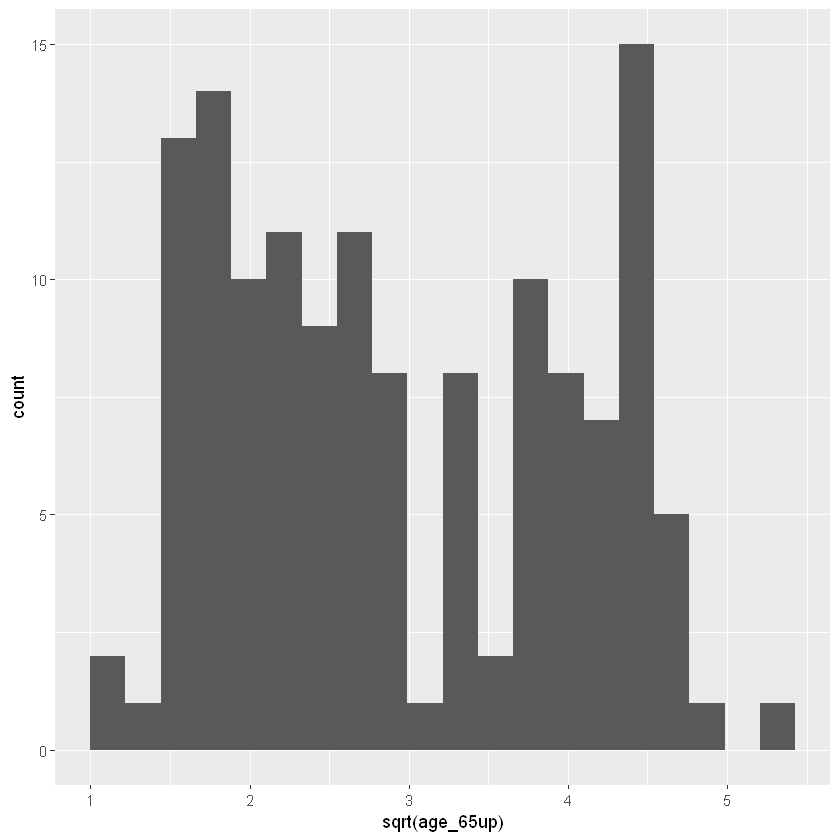

In [46]:
drop_na(data) %>%
    ggplot(aes(sqrt(age_65up))) +
    geom_histogram(bins = 20)

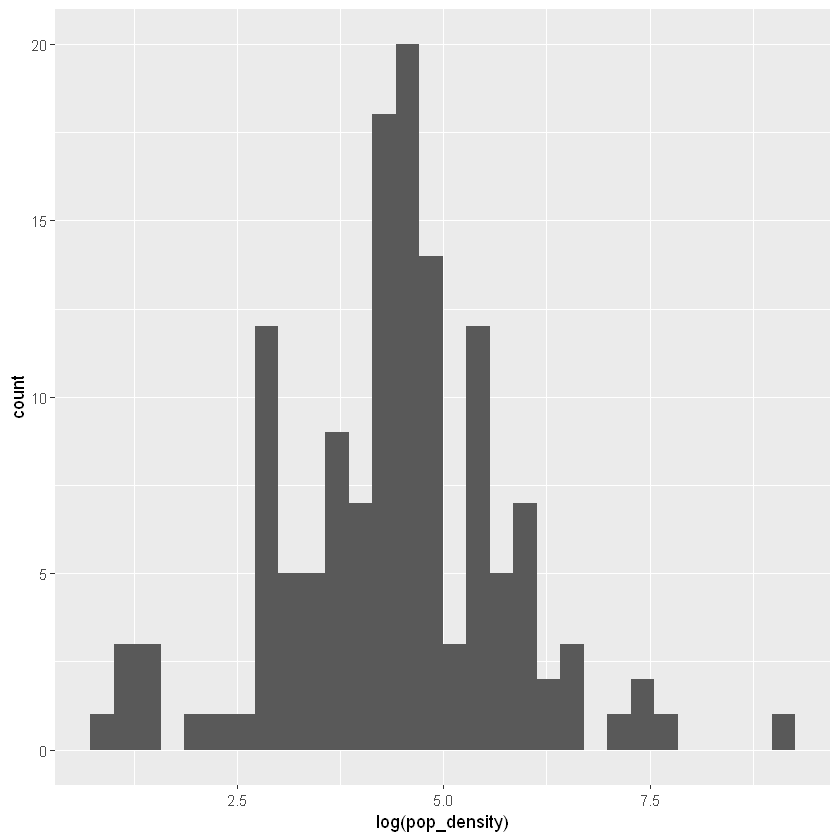

In [47]:
drop_na(data) %>%
    ggplot(aes(log(pop_density))) +
    geom_histogram(bins = 30)

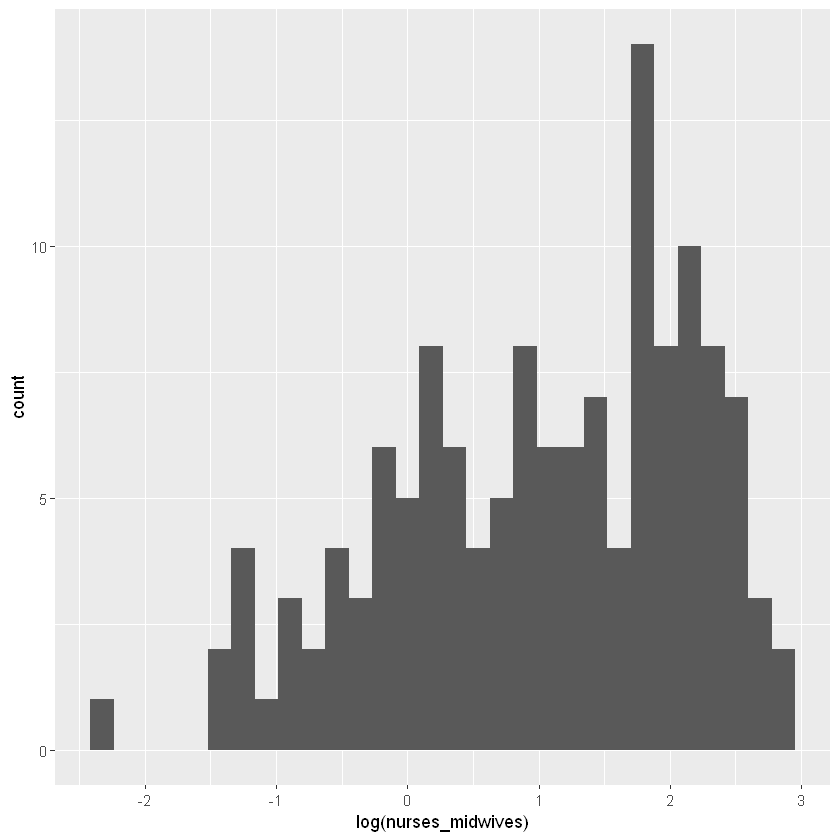

In [210]:
drop_na(data) %>%
    ggplot(aes(log(nurses_midwives))) +
    geom_histogram(bins = 30)

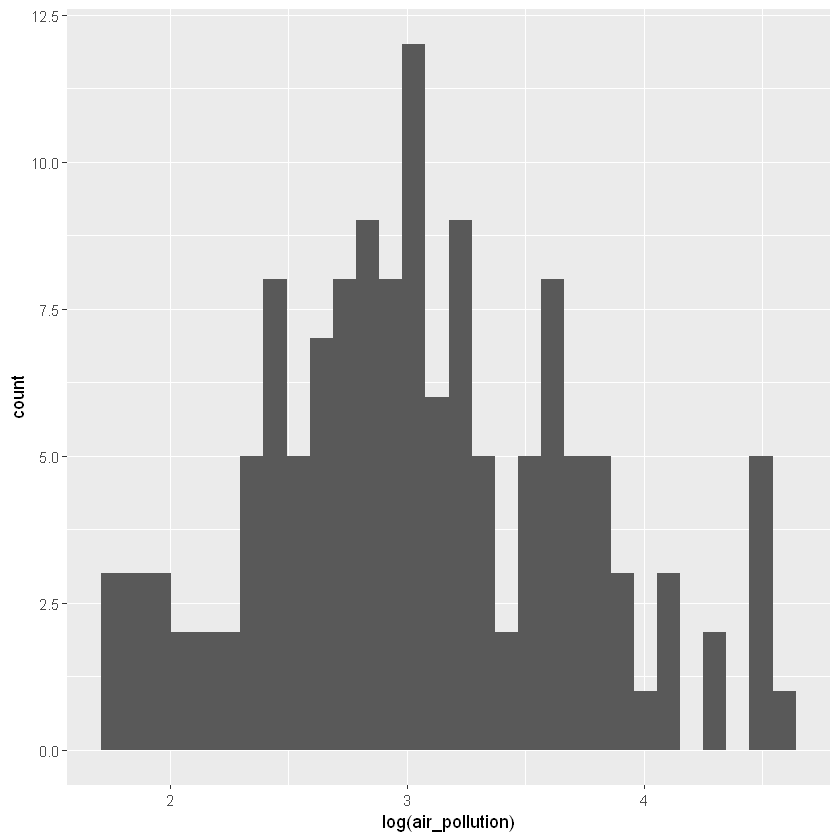

In [205]:
drop_na(data) %>%
    ggplot(aes(log(air_pollution))) +
    geom_histogram(bins = 30)

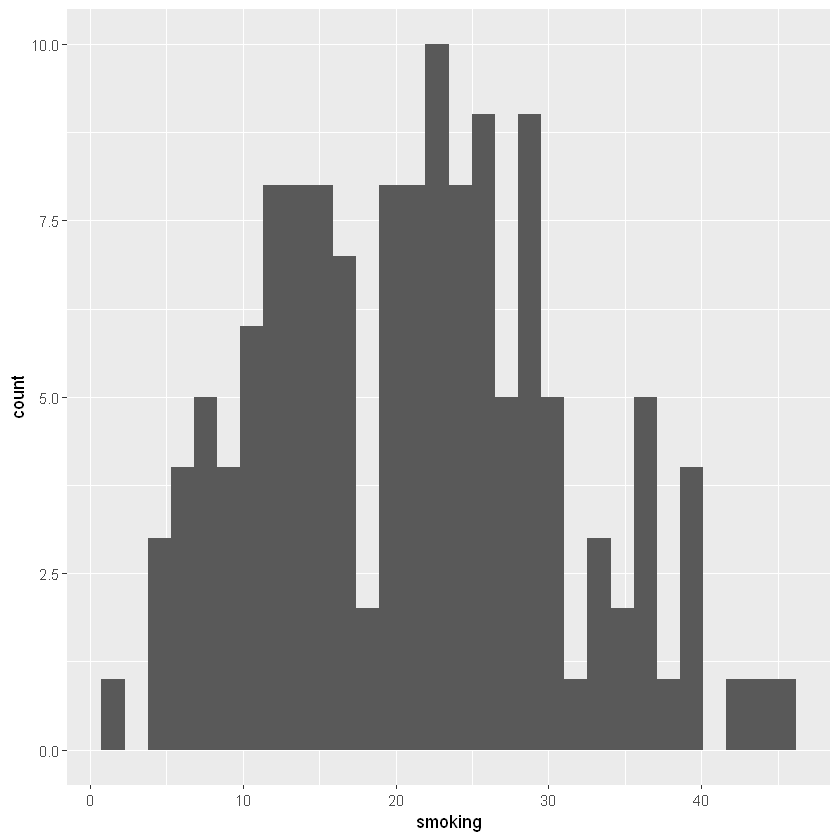

In [211]:
drop_na(data) %>%
    ggplot(aes(smoking)) +
    geom_histogram(bins = 30)

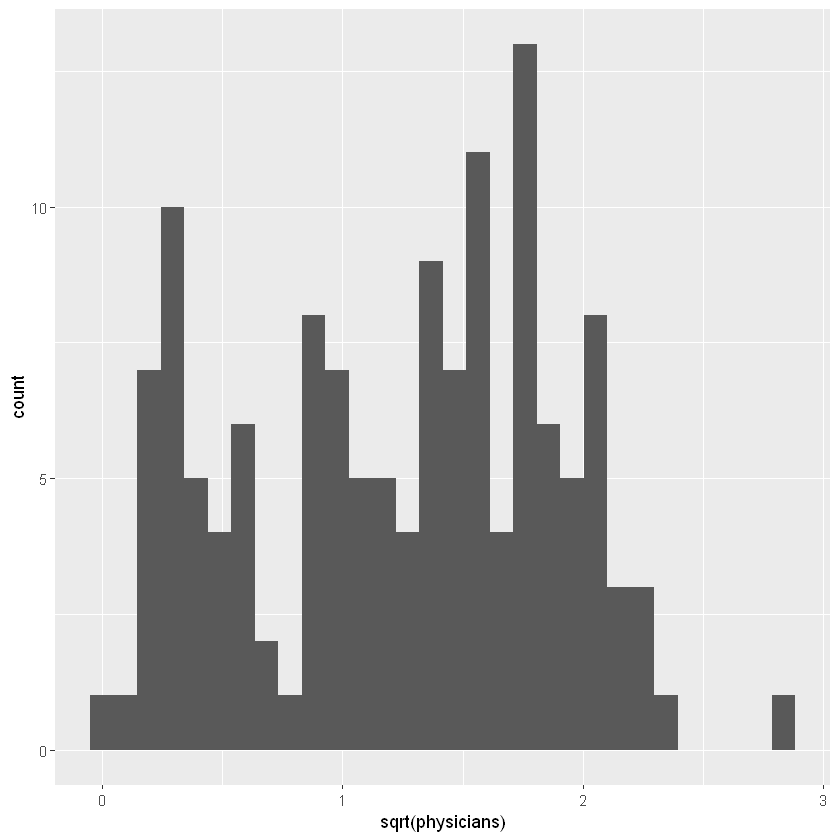

In [216]:
drop_na(data) %>%
    ggplot(aes(sqrt(physicians))) +
    geom_histogram(bins = 30)

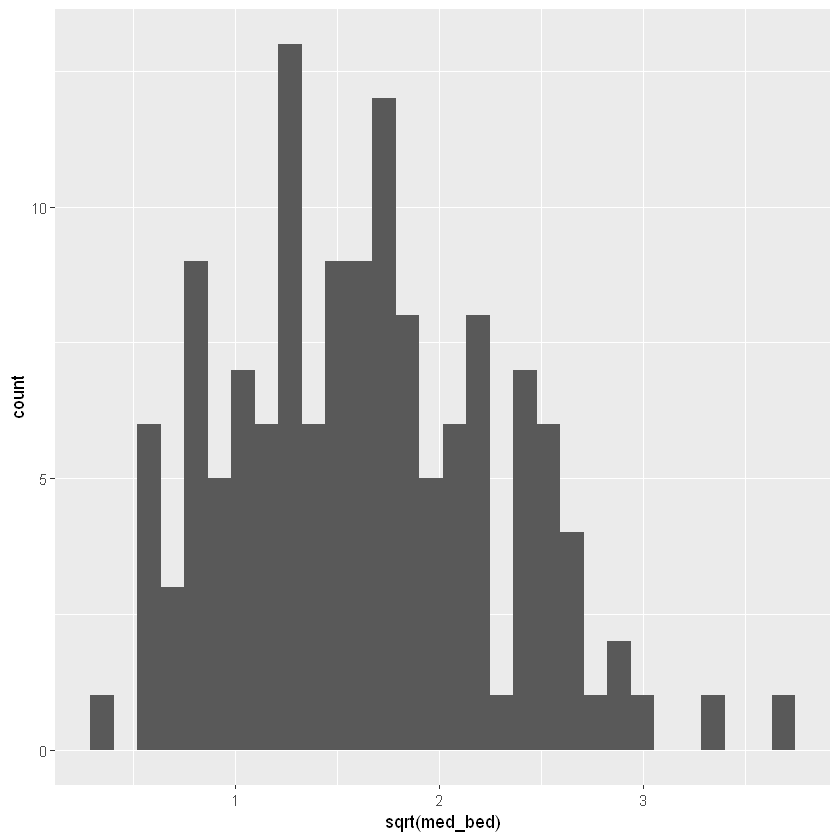

In [219]:
drop_na(data) %>%
    ggplot(aes(sqrt(med_bed))) +
    geom_histogram(bins = 30)

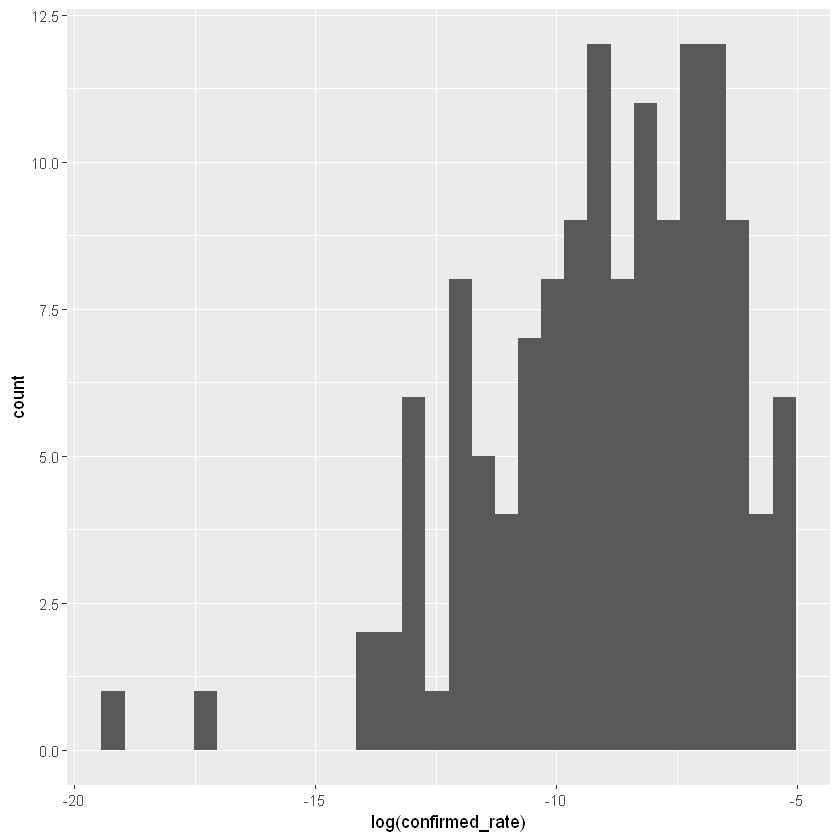

In [221]:
drop_na(data) %>%
    ggplot(aes(log(confirmed_rate))) +
    geom_histogram(bins = 30)

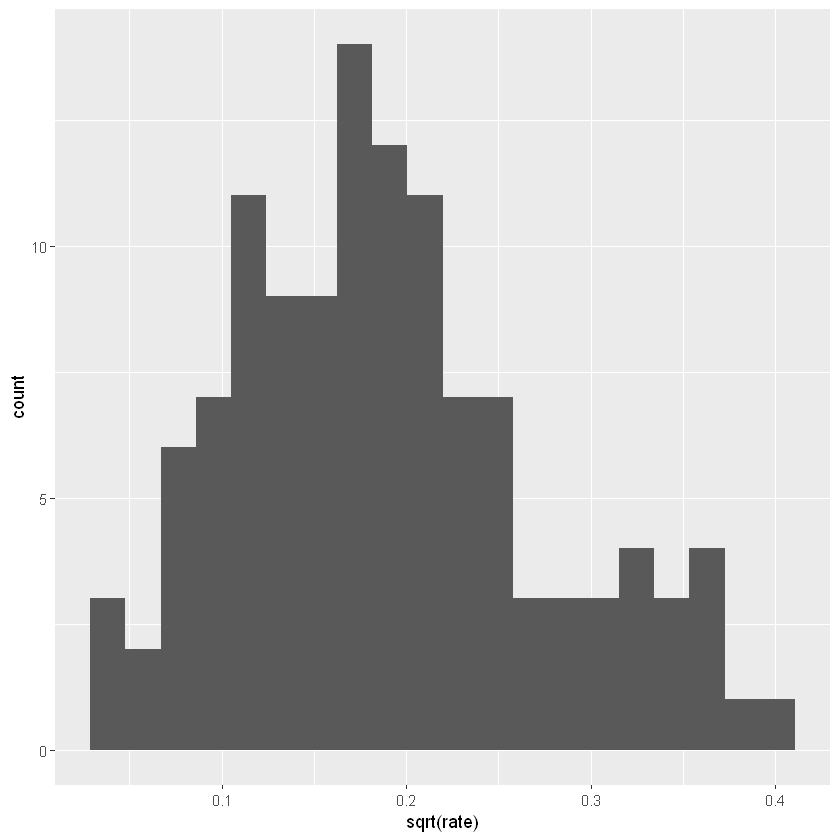

In [198]:
drop_na(data) %>%
    filter(rate != 0) %>%
    ggplot(aes(sqrt(rate))) +
    geom_histogram(bins = 20)

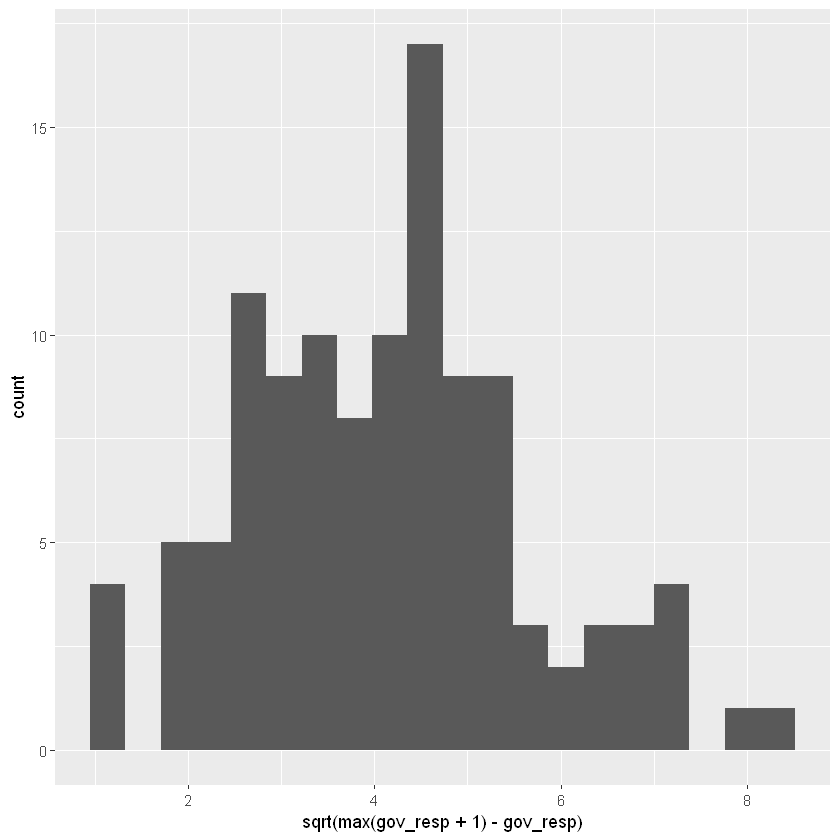

In [226]:
drop_na(data_gov) %>%
    ggplot(aes(sqrt(max(gov_resp + 1) - gov_resp))) +
    geom_histogram(bins = 20)

In [47]:
p1 <- drop_na(data) %>%
    ggplot(aes(age_65up, 
               rate, 
               text = paste(
                   'country', country,
                   '\nage_65up', age_65up,
                   '\nrate', rate
               ))) +
    geom_point()

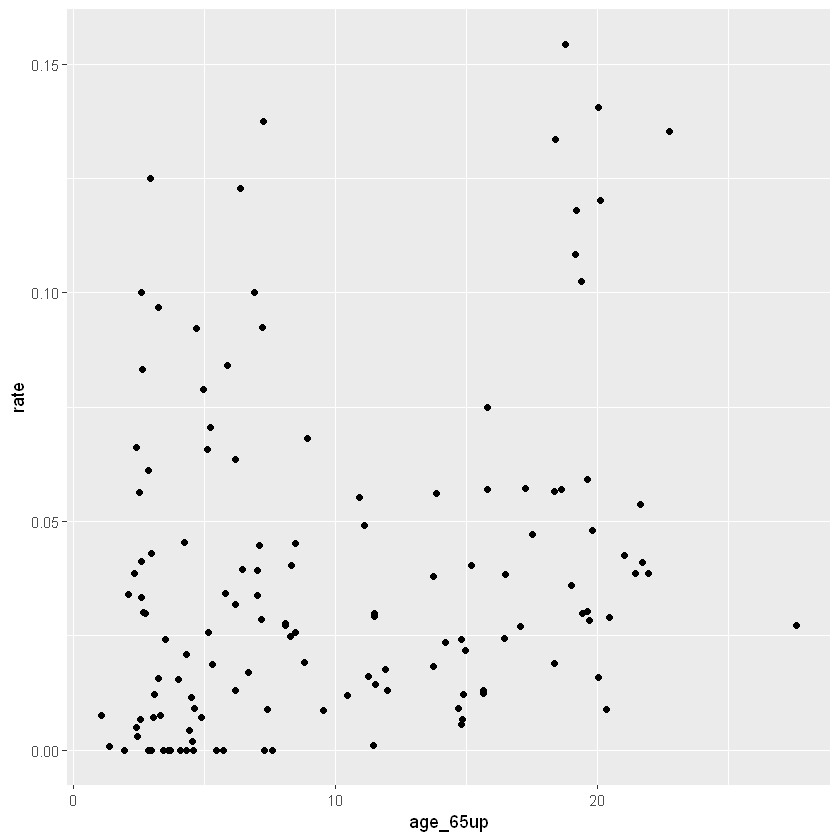

In [48]:
p1

In [ ]:
ggplotly(p1, tooltip = "text")

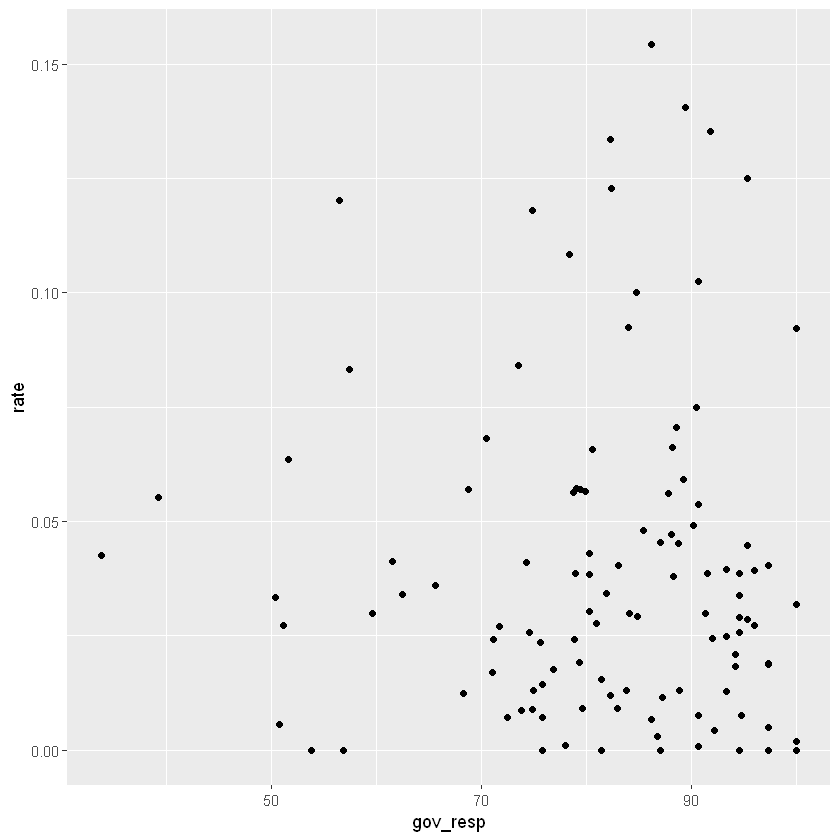

In [50]:
drop_na(data_gov) %>%
    ggplot(aes(gov_resp, rate)) +
    geom_point()

In [51]:
colnames(data)
colnames(data_gov)

[1] "country"              "year_pop_total"       "pop_total"           
 [4] "year_age_65up"        "age_65up"             "year_age_1564"       
 [7] "age_1564"             "year_air_pollution"   "air_pollution"       
[10] "year_med_bed"         "med_bed"              "year_physicians"     
[13] "physicians"           "year_nurses_midwives" "nurses_midwives"     
[16] "year_pop_density"     "pop_density"          "year_smoking"        
[19] "smoking"              "confirmed"            "death"               
[22] "rate"                 "confirmed_rate"

[1] "country"              "year_pop_total"       "pop_total"           
 [4] "year_age_65up"        "age_65up"             "year_age_1564"       
 [7] "age_1564"             "year_air_pollution"   "air_pollution"       
[10] "year_med_bed"         "med_bed"              "year_physicians"     
[13] "physicians"           "year_nurses_midwives" "nurses_midwives"     
[16] "year_pop_density"     "pop_density"          "year_smoking"        
[19] "smoking"              "confirmed"            "death"               
[22] "rate"                 "confirmed_rate"       "gov_resp"

In [48]:
df_no_gov <- data[c(-1, -2, -3, -4, -6, -7, -8, -10, -12, -14, -16, -18, -20, -21)]
df_cp <- data_gov[c(-1, -2, -3, -4, -6, -7, -8, -10, -12, -14, -16, -18, -20, -21)]

In [53]:
colnames(df_no_gov)
colnames(df_cp)

[1] "age_65up"        "air_pollution"   "med_bed"         "physicians"     
[5] "nurses_midwives" "pop_density"     "smoking"         "rate"           
[9] "confirmed_rate"

[1] "age_65up"        "air_pollution"   "med_bed"         "physicians"     
 [5] "nurses_midwives" "pop_density"     "smoking"         "rate"           
 [9] "confirmed_rate"  "gov_resp"

In [54]:
str(df_no_gov)

'data.frame':	180 obs. of  9 variables:
 $ age_65up       : num  2.58 13.74 6.36 NA 2.22 ...
 $ air_pollution  : num  56.9 18.2 38.9 10.3 32.4 ...
 $ med_bed        : num  0.5 2.9 1.9 2.5 0.8 3.8 5 4.2 3.8 7.6 ...
 $ physicians     : num  0.284 1.2 1.83 3.333 0.215 ...
 $ nurses_midwives: num  0.32 3.6 2.24 4.01 1.31 ...
 $ pop_density    : num  56.9 104.6 17.7 163.8 24.7 ...
 $ smoking        : num  NA 28.7 15.6 33.5 NA NA 21.8 24.1 14.7 29.6 ...
 $ rate           : num  0.0335 0.038 0.1228 0.0538 0.0741 ...
 $ confirmed_rate : num  4.58e-05 2.57e-04 8.33e-05 9.65e-03 8.76e-07 ...


In [55]:
summary(df_no_gov)

    age_65up      air_pollution       med_bed         physicians    
 Min.   : 1.085   Min.   : 5.861   Min.   : 0.100   Min.   :0.0008  
 1st Qu.: 3.316   1st Qu.:15.876   1st Qu.: 1.200   1st Qu.:0.3200  
 Median : 6.440   Median :22.472   Median : 2.300   Median :1.3199  
 Mean   : 8.803   Mean   :28.428   Mean   : 2.913   Mean   :1.7727  
 3rd Qu.:14.104   3rd Qu.:38.077   3rd Qu.: 4.000   3rd Qu.:2.8990  
 Max.   :27.576   Max.   :99.734   Max.   :13.800   Max.   :8.1900  
 NA's   :6        NA's   :4        NA's   :3        NA's   :3       
 nurses_midwives    pop_density           smoking           rate         
 Min.   : 0.0611   Min.   :    2.041   Min.   : 2.00   Min.   :0.000000  
 1st Qu.: 1.0205   1st Qu.:   36.095   1st Qu.:13.72   1st Qu.:0.008871  
 Median : 2.6328   Median :   83.932   Median :21.55   Median :0.028415  
 Mean   : 4.1489   Mean   :  312.834   Mean   :21.22   Mean   :0.038498  
 3rd Qu.: 6.3180   3rd Qu.:  203.073   3rd Qu.:27.80   3rd Qu.:0.055464  
 Max

In [56]:
str(df_cp)

'data.frame':	141 obs. of  10 variables:
 $ age_65up       : num  2.58 13.74 6.36 NA 2.22 ...
 $ air_pollution  : num  56.9 18.2 38.9 10.3 32.4 ...
 $ med_bed        : num  0.5 2.9 1.9 2.5 0.8 5 3.8 7.6 4.7 2 ...
 $ physicians     : num  0.284 1.2 1.83 3.333 0.215 ...
 $ nurses_midwives: num  0.32 3.6 2.24 4.01 1.31 ...
 $ pop_density    : num  56.9 104.6 17.7 163.8 24.7 ...
 $ smoking        : num  NA 28.7 15.6 33.5 NA 21.8 14.7 29.6 20.8 26.4 ...
 $ rate           : num  0.0335 0.038 0.1228 0.0538 0.0741 ...
 $ confirmed_rate : num  4.58e-05 2.57e-04 8.33e-05 9.65e-03 8.76e-07 ...
 $ gov_resp       : num  73.5 88.4 82.4 59.1 86.8 ...


In [57]:
summary(df_cp)

    age_65up      air_pollution       med_bed         physicians    
 Min.   : 1.085   Min.   : 5.861   Min.   : 0.100   Min.   :0.0008  
 1st Qu.: 3.581   1st Qu.:14.535   1st Qu.: 1.300   1st Qu.:0.4548  
 Median : 7.083   Median :21.569   Median : 2.300   Median :1.7605  
 Mean   : 9.251   Mean   :27.965   Mean   : 2.936   Mean   :1.8938  
 3rd Qu.:14.815   3rd Qu.:38.091   3rd Qu.: 3.950   3rd Qu.:3.0164  
 Max.   :27.576   Max.   :94.054   Max.   :13.400   Max.   :8.1900  
 NA's   :4        NA's   :2        NA's   :2        NA's   :2       
 nurses_midwives    pop_density          smoking           rate        
 Min.   : 0.1059   Min.   :   2.041   Min.   : 2.00   Min.   :0.00000  
 1st Qu.: 1.1471   1st Qu.:  31.663   1st Qu.:13.95   1st Qu.:0.01311  
 Median : 2.7750   Median :  88.531   Median :21.50   Median :0.03279  
 Mean   : 4.4203   Mean   : 207.213   Mean   :21.18   Mean   :0.04231  
 3rd Qu.: 6.6227   3rd Qu.: 180.298   3rd Qu.:27.60   3rd Qu.:0.05693  
 Max.   :18.1247

In [103]:
# age_75 <- quantile(country_data$age_65up, 0.75, na.rm = TRUE, names = FALSE)
# age_75

[1] 13.72548

In [104]:
# sum(df_cp$age_65up > age_75, na.rm = TRUE)

[1] 40

In [105]:
# rate_75 <- quantile(covid19$rate, 0.75, na.rm = TRUE, names = FALSE)
# rate_75

[1] 0.05525632

In [107]:
# sum(df_cp$rate > rate_75, na.rm = TRUE)

[1] 39

## 6. Research question

Does a higher portion of the old (age 65 and up) in the population (population aging) lead to a higher COVID-19 death rate?

Null hypothesis ($H_0$):

> A higher portion of the old (age 65 and up) in the population (population aging) does not lead to a higher COVID-19 death rate.

Alternative hypothesis ($H_A$):

> A higher portion of the old (age 65 and up) in the population (population aging) leads to a higher COVID-19 death rate.

## 7. Data Analysis & Visualizations

#### I. Linear regression

In [49]:
#'
#'
analyze_lm <- function(model){
    model %>%
        broom::tidy() %>%
        mutate(p.value.adjust = p.adjust(p.value, method = "BH"),
               significant = p.value.adjust < 0.05)
}

1) Check all the potential confounding variables:

In [59]:
fit <- lm(rate ~ ., df_cp)

analyze_lm(fit)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),3.047940e-02,2.235971e-02,1.363139514,0.1757824796,0.292970799,FALSE
age_65up,3.266314e-03,8.956228e-04,3.646974668,0.0004164924,0.004164924,TRUE
air_pollution,-2.236423e-05,1.920940e-04,-0.116423343,0.9075415574,0.998641754,FALSE
med_bed,-3.926661e-03,2.222350e-03,-1.766896043,0.0801792324,0.292970799,FALSE
physicians,-7.936303e-04,3.409581e-03,-0.232764714,0.8164015861,0.998641754,FALSE
nurses_midwives,-1.764807e-03,1.229300e-03,-1.435619167,0.1541116232,0.292970799,FALSE
pop_density,-6.280348e-06,4.080428e-06,-1.539139322,0.1268074136,0.292970799,FALSE
smoking,-2.120124e-04,4.119752e-04,-0.514624235,0.6079075770,0.868439396,FALSE
confirmed_rate,5.493238e+00,3.290078e+00,1.669637743,0.0979984788,0.292970799,FALSE


In [60]:
fit <- lm(rate ~ ., df_no_gov)

analyze_lm(fit)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),4.145850e-02,0.0101494288,4.084811,7.727774e-05,0.0006954997,TRUE
age_65up,2.727048e-03,0.0008488849,3.212507,1.664681e-03,0.0074910660,TRUE
air_pollution,-1.942391e-04,0.0001756020,-1.106132,2.707439e-01,0.3093804367,FALSE
med_bed,-3.105694e-03,0.0020174383,-1.539425,1.261691e-01,0.2171446348,FALSE
physicians,-1.142673e-03,0.0033087865,-0.345345,7.304019e-01,0.7304018940,FALSE
nurses_midwives,-1.814256e-03,0.0012365078,-1.467242,1.447631e-01,0.2171446348,FALSE
pop_density,-6.907478e-06,0.0000040539,-1.703909,9.082453e-02,0.2043551976,FALSE
smoking,-4.117416e-04,0.0003755730,-1.096302,2.750048e-01,0.3093804367,FALSE
confirmed_rate,6.527758e+00,3.3134644341,1.970070,5.098916e-02,0.1529674929,FALSE


> The `df_no_gov` data frame has more observations than the `df_cp` data frame. But the results are similar. Considering that I want to include the `gov_resp` variable in my model, I'll use the `df_cp` data frame in my following analysis.
>
> The model fitted with the `df_cp` data frame indicates that no confounder is significant (adjusted p-value < 0.05). The four confounding variables with the lowest adjusted p-values are `med_bed`, `pop_density`, `nurses_midwives`, and `confirmed_rate`. I'll test those variables individually. Besides, `gov_resp` could be a good potential confounder and I'll test it as well.


In [50]:
# prepare the data frame for individual testing
df_sub <- df_cp %>%
    select(rate, age_65up, med_bed, pop_density, 
           nurses_midwives, confirmed_rate, gov_resp) %>%
    drop_na()

In [51]:
# 6 observations are removed, which is not too bad
dim(df_sub)

[1] 135   7

2) Check selected confounding variables individually

In [63]:
# base model
base <- lm(rate ~ age_65up, df_sub)

analyze_lm(base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.031128874,0.0058616878,5.310565,4.463533e-07,8.927066e-07,TRUE
age_65up,0.001214216,0.0005151427,2.357047,1.987983e-02,1.987983e-02,TRUE


In [64]:
# add med_bed to the base model
fit_1 <- lm(rate ~ age_65up + med_bed, df_sub)

analyze_lm(fit_1)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.034806530,0.0058322185,5.967974,2.083585e-08,6.250755e-08,TRUE
age_65up,0.002510293,0.0006654547,3.772297,2.432430e-04,3.648644e-04,TRUE
med_bed,-0.005362246,0.0018131666,-2.957393,3.677099e-03,3.677099e-03,TRUE


In [65]:
anova(fit_1, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.1890903,NA,NA,NA,NA
133,0.2016192,-1,-0.01252891,8.746171,0.003677099


> The model with `med_bed` is significantly (p-value < 0.05) different from the base model. I could add `med_bed` in my final model.

In [66]:
# add pop_density to the base model
fit_2 <- lm(rate ~ age_65up + pop_density, df_sub)

analyze_lm(fit_2)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),3.219048e-02,5.916045e-03,5.441216,2.485878e-07,7.457635e-07,TRUE
age_65up,1.227200e-03,5.143323e-04,2.386007,1.845238e-02,2.767856e-02,TRUE
pop_density,-5.741454e-06,4.724150e-06,-1.215341,2.264053e-01,2.264053e-01,FALSE


In [67]:
anova(fit_2, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.1993881,NA,NA,NA,NA
133,0.2016192,-1,-0.002231114,1.477054,0.2264053


> The model with `pop_density` is not significantly (p-value < 0.05) different from the base model. I would not add `pop_density` in my final model.

In [68]:
# add confirmed_rate to the base model
fit_3 <- lm(rate ~ age_65up + confirmed_rate, df_sub)

analyze_lm(fit_3)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.031340618,0.0058785634,5.3313396,4.101413e-07,1.230424e-06,TRUE
age_65up,0.001015205,0.0005816089,1.7455109,8.322285e-02,1.248343e-01,FALSE
confirmed_rate,2.434892512,3.2828962652,0.7416904,4.595926e-01,4.595926e-01,FALSE


In [69]:
anova(fit_3, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.2007825,NA,NA,NA,NA
133,0.2016192,-1,-0.0008367527,0.5501046,0.4595926


> The model with `confirmed_rate` is not significantly (p-value < 0.05) different from the base model. I would not add `confirmed_rate` in my final model.

In [70]:
# add nurses_midwives to the base model
fit_4 <- lm(rate ~ age_65up + nurses_midwives, df_sub)

analyze_lm(fit_4)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.031692374,0.0058283766,5.437599,2.527428e-07,7.582284e-07,TRUE
age_65up,0.002062523,0.0007108536,2.901473,4.353173e-03,6.529760e-03,TRUE
nurses_midwives,-0.001925086,0.0011204575,-1.718125,8.811857e-02,8.811857e-02,FALSE


In [71]:
anova(fit_4, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.1972090,NA,NA,NA,NA
133,0.2016192,-1,-0.00441024,2.951953,0.08811857


In [72]:
# add gov_resp to the base model
fit_5 <- lm(rate ~ age_65up + gov_resp, df_sub)

analyze_lm(fit_5)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.0682421118,0.0186604523,3.657045,0.0003673733,0.00110212,TRUE
age_65up,0.0011496097,0.0005096615,2.255634,0.0257390664,0.03834713,TRUE
gov_resp,-0.0004534065,0.0002167255,-2.092078,0.0383471324,0.03834713,TRUE


In [73]:
anova(fit_5, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.1951486,NA,NA,NA,NA
133,0.2016192,-1,-0.006470638,4.376789,0.03834713


> The model with `gov_resp` is significantly (p-value < 0.05) different from the base model. I would not add `gov_resp` in my final model.

In [160]:
# add med_bed and gov_resp to the base model
fit_6 <- lm(rate ~ age_65up + med_bed + gov_resp, df_sub)

analyze_lm(fit_6)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.0821109952,0.0183949142,4.463788,1.718541e-05,6.874165e-05,TRUE
age_65up,0.0026199868,0.0006513501,4.022394,9.679219e-05,1.935844e-04,TRUE
med_bed,-0.0061528673,0.0017952518,-3.427301,8.150186e-04,1.086691e-03,TRUE
gov_resp,-0.0005712867,0.0002112271,-2.704609,7.747253e-03,7.747253e-03,TRUE


In [75]:
anova(fit_6, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
131,0.1790901,NA,NA,NA,NA
133,0.2016192,-2,-0.02252913,8.239751,0.0004259377


In [76]:
anova(fit_6, fit_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
131,0.1790901,NA,NA,NA,NA
132,0.1993881,-1,-0.02029801,14.8475,0.0001816851


In [77]:
anova(fit_6, fit_5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
131,0.1790901,NA,NA,NA,NA
132,0.1951486,-1,-0.01605849,11.74639,0.0008150186


> The model with `med_bed` and `gov_resp` is significantly (p-value < 0.05) different from the base model and the model with only `med_bed` or `gov_resp`. I would use this as my final model.

Check the residuals:

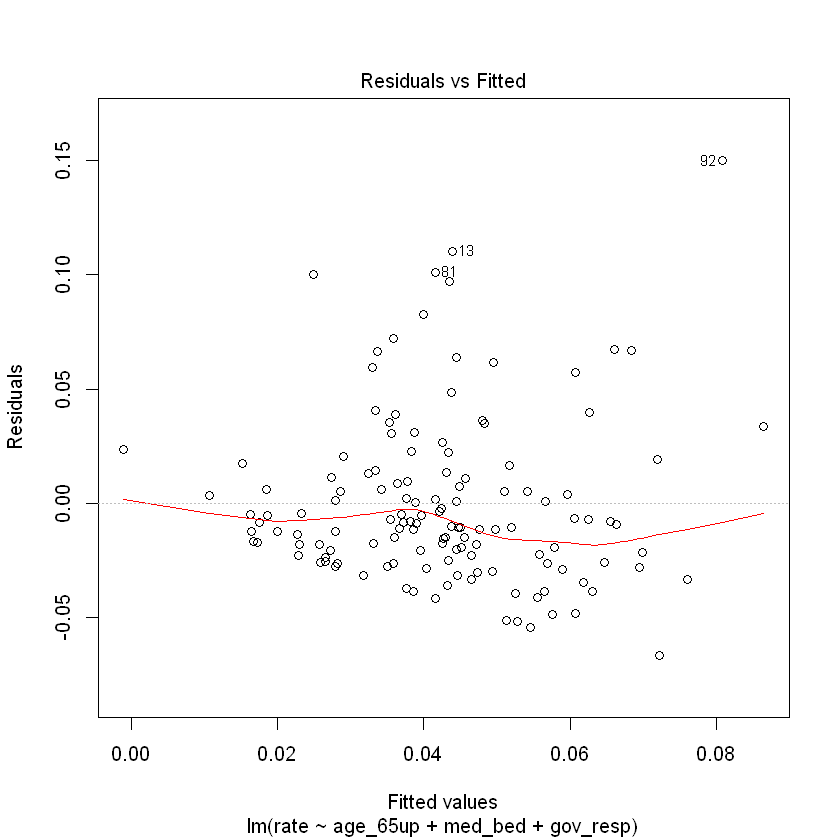

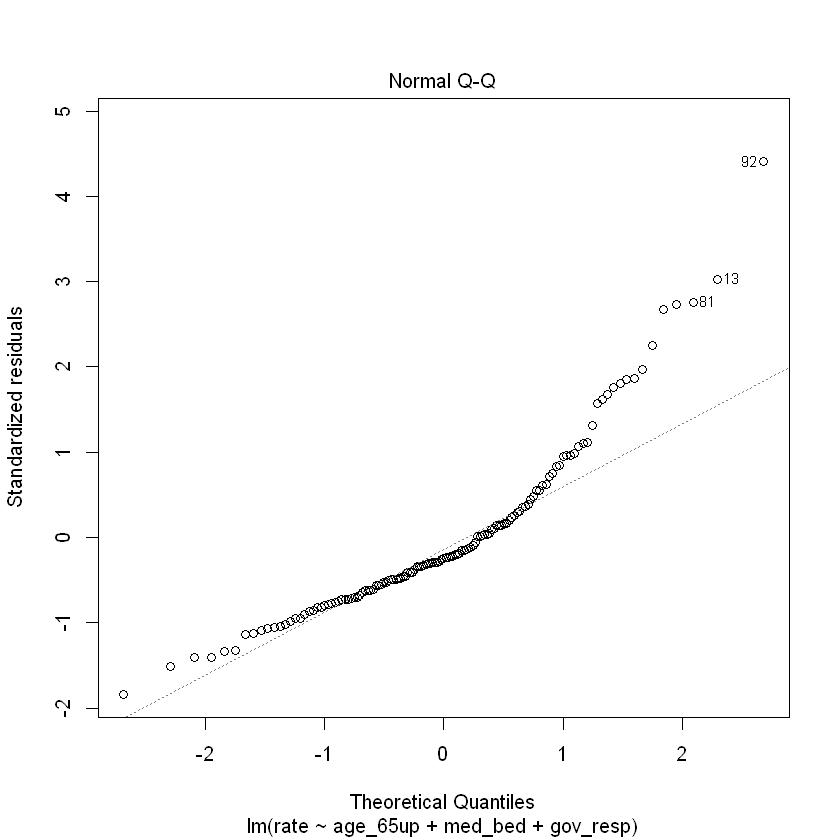

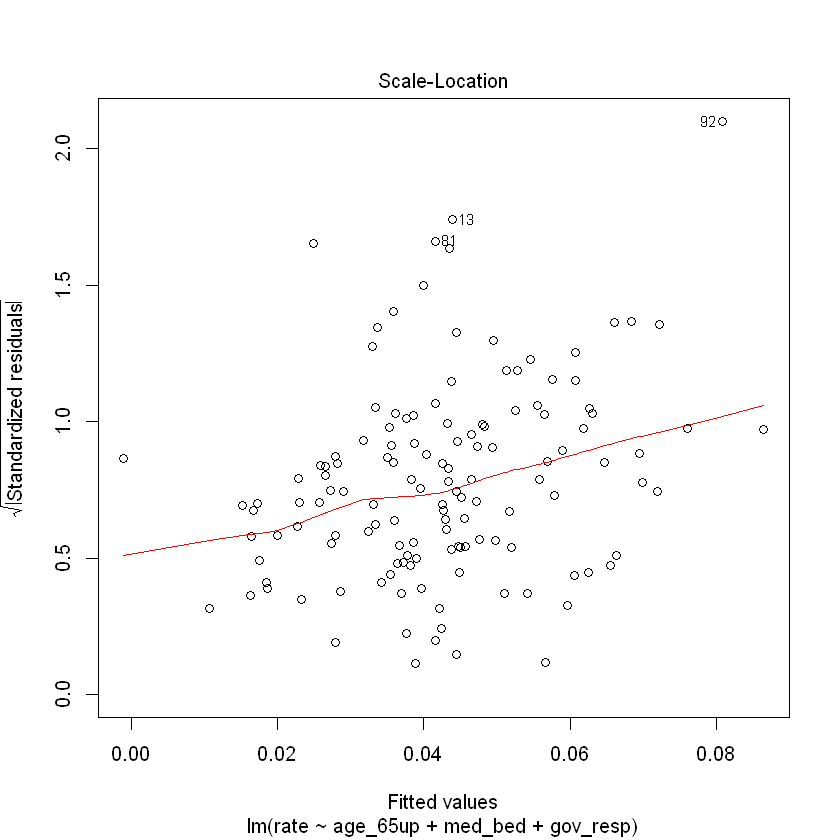

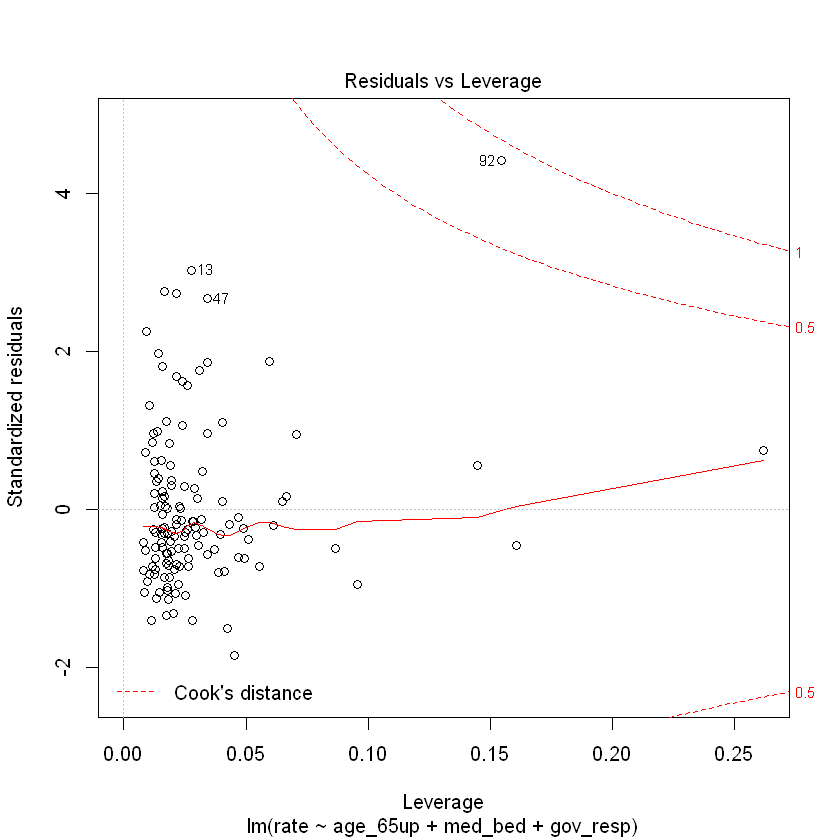

In [283]:
plot(fit_6)

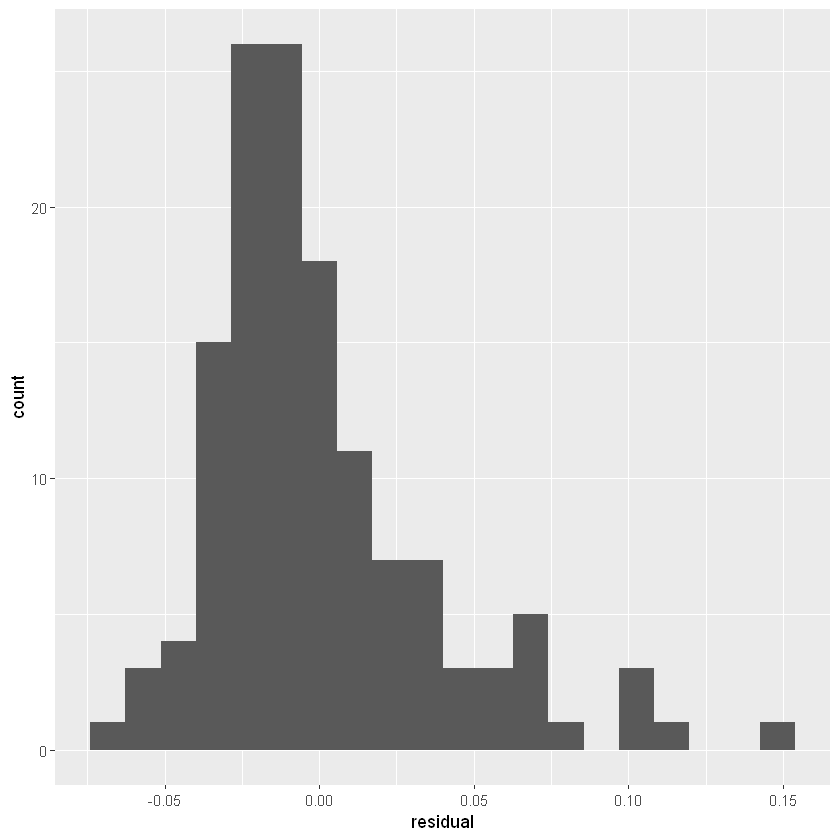

In [284]:
tibble(residual = fit_6$residuals) %>%
    ggplot(aes(residual)) +
    geom_histogram(bins = 20)

> The distribution is slightly right skewed. So the residuals does not follow the normal distribution. It seems that my model failed to capture some features.

3) Data transformation

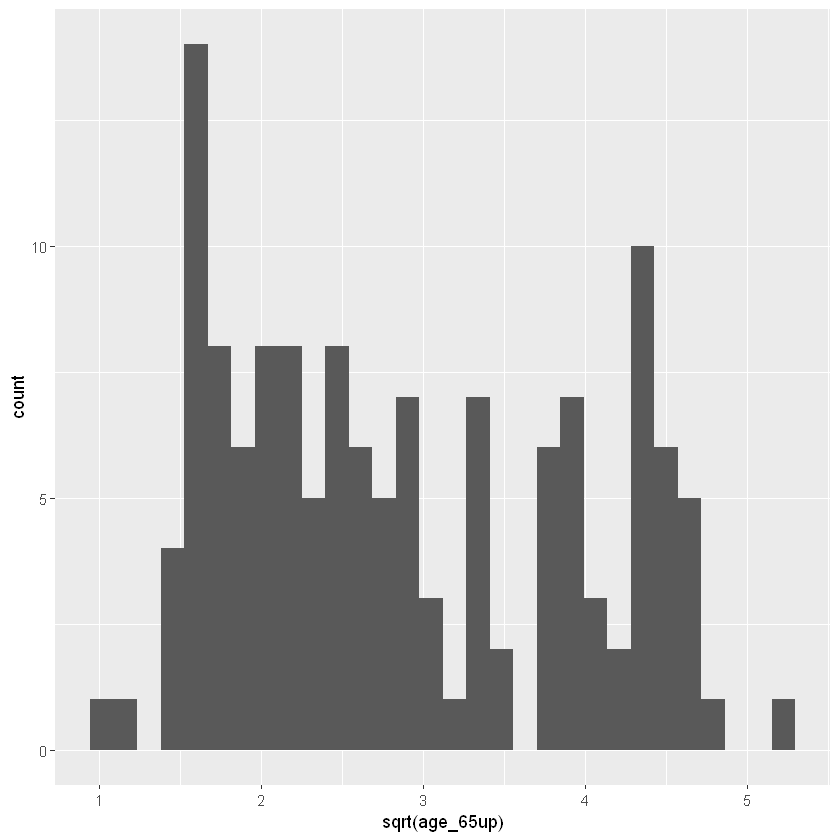

In [289]:
df_sub %>%
    ggplot(aes(sqrt(age_65up))) +
    geom_histogram(bins = 30)

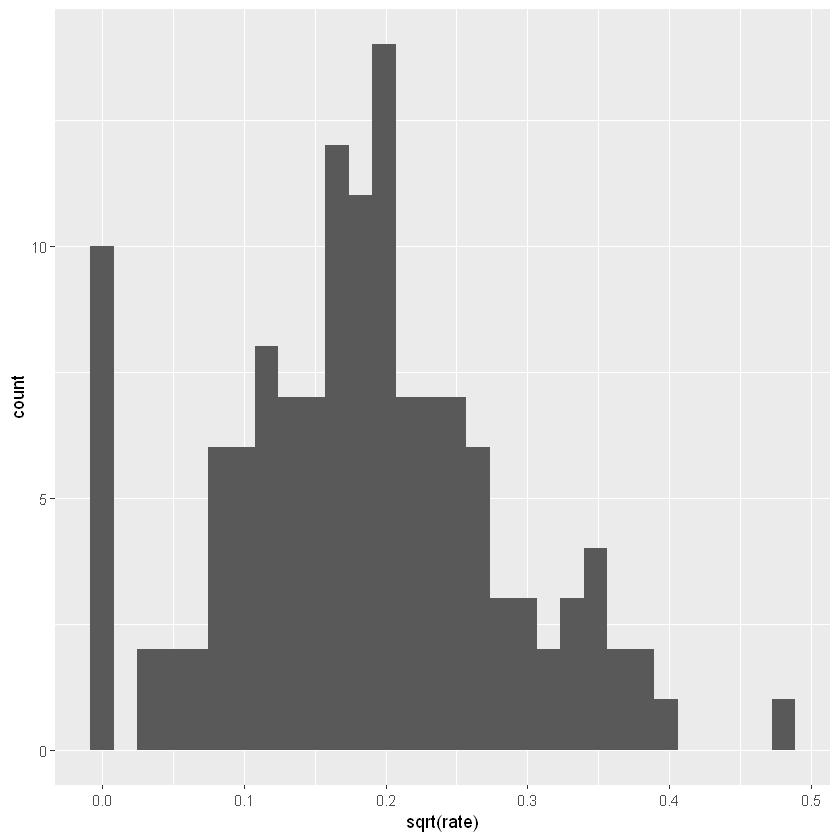

In [61]:
df_sub %>%
    ggplot(aes(sqrt(rate))) +
    geom_histogram(bins = 30)

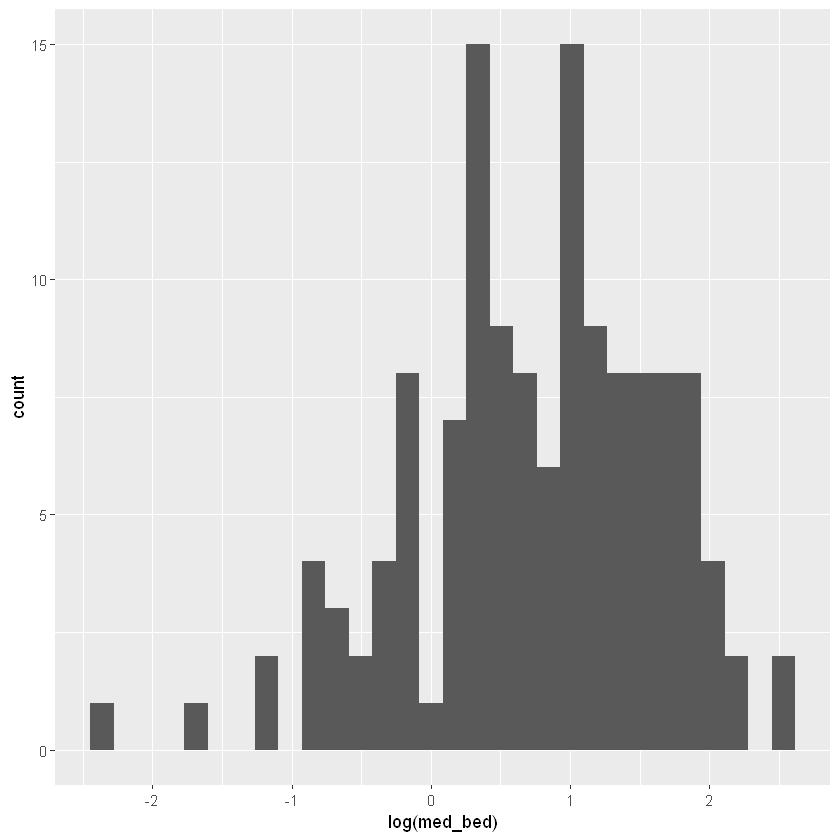

In [53]:
df_sub %>%
    ggplot(aes(log(med_bed))) +
    geom_histogram(bins = 30)

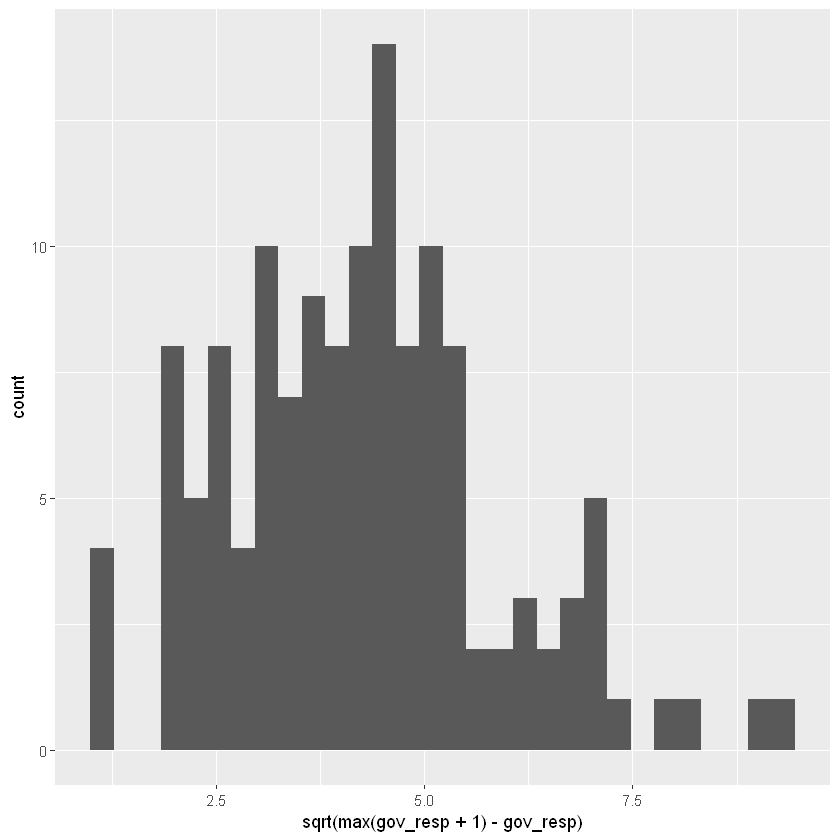

In [54]:
df_sub %>%
    ggplot(aes(sqrt(max(gov_resp + 1) - gov_resp))) +
    geom_histogram(bins = 30)

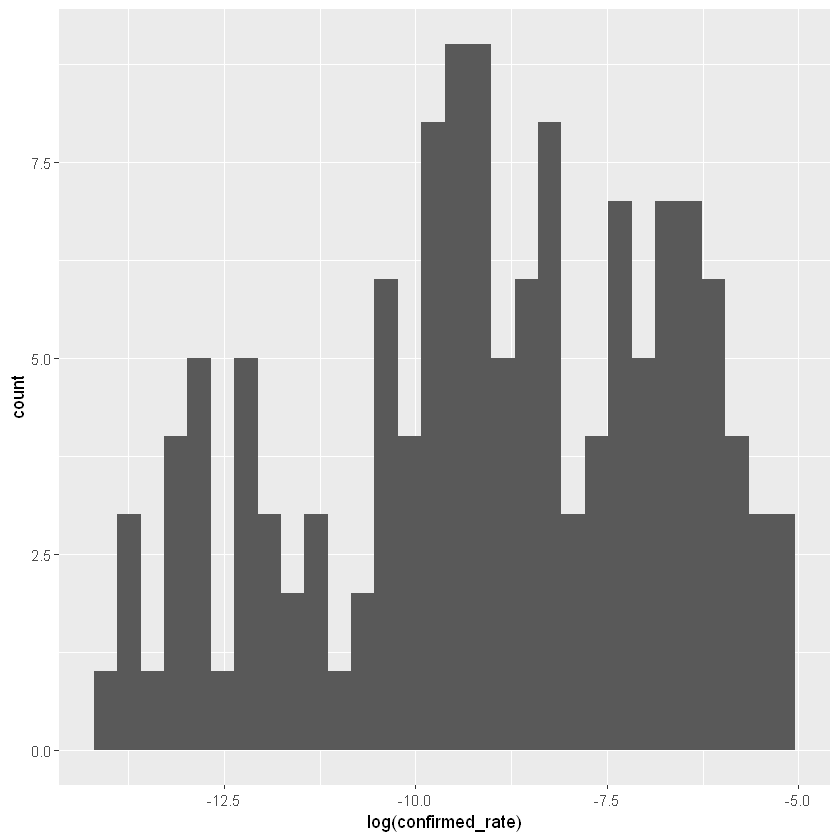

In [55]:
df_sub %>%
    ggplot(aes(log(confirmed_rate))) +
    geom_histogram(bins = 30)

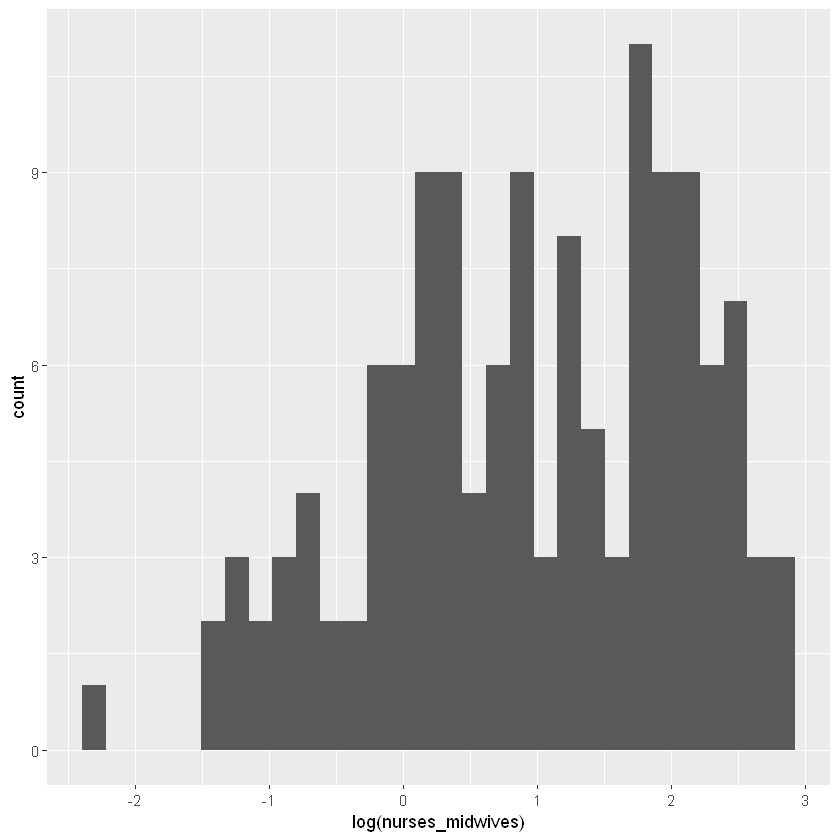

In [56]:
df_sub %>%
    ggplot(aes(log(nurses_midwives))) +
    geom_histogram(bins = 30)

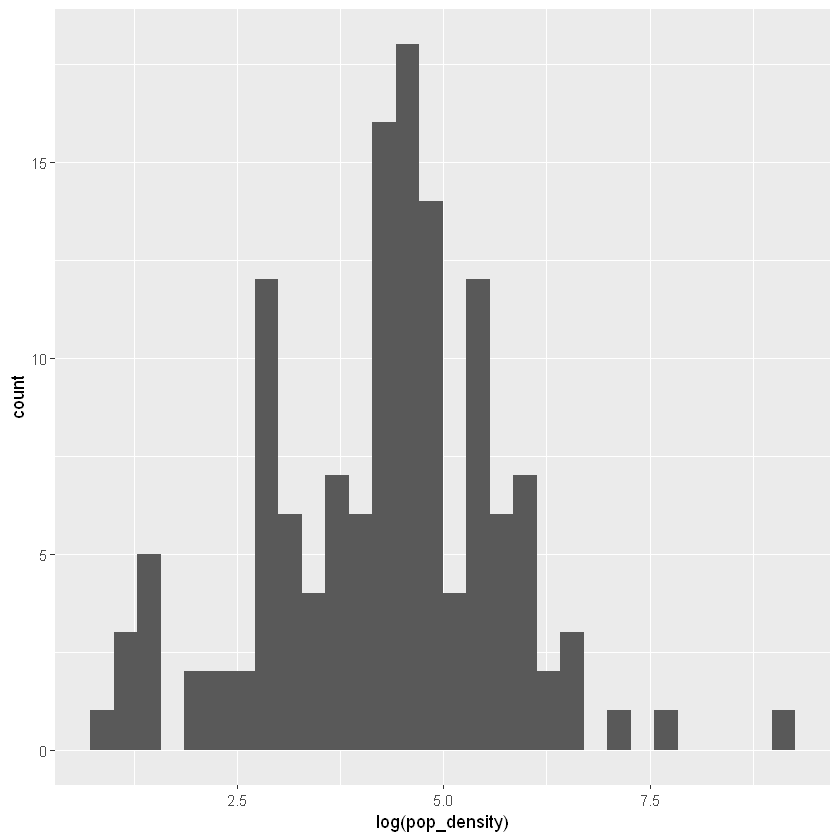

In [57]:
df_sub %>%
    ggplot(aes(log(pop_density))) +
    geom_histogram(bins = 30)

In [279]:
# df_cp_2 <- df_cp %>%
#      filter(rate != 0) %>%
#     mutate(rate_sqrt = sqrt(rate),
#            age_65up_sqrt = sqrt(age_65up),
#            med_bed_log = log(med_bed),
#            gov_resp_sqrt_trans = sqrt(max(gov_resp + 1) - gov_resp),
#            confirmed_rate_log = log(confirmed_rate),
#            physicians_sqrt = sqrt(physicians),
#            air_pollution_log = log(air_pollution),
#            nurses_midwives_log = log(nurses_midwives),
#            pop_density_log = log(pop_density)) %>%
#     select(rate_sqrt, age_65up_sqrt,med_bed_log, gov_resp_sqrt_trans, 
#            smoking, confirmed_rate_log, physicians_sqrt, air_pollution_log,
#            nurses_midwives_log, pop_density_log)


In [62]:
df_trans <- df_sub %>%
    filter(rate != 0) %>%
    mutate(rate_sqrt = sqrt(rate),
           age_65up_sqrt = sqrt(age_65up),
           med_bed_log = log(med_bed),
           gov_resp_sqrt_trans = sqrt(max(gov_resp + 1) - gov_resp),
           confirmed_rate_log = log(confirmed_rate),
           nurses_midwives_log = log(nurses_midwives),
           pop_density_log = log(pop_density)) %>%
    select(rate_sqrt, age_65up_sqrt,med_bed_log, gov_resp_sqrt_trans, 
           confirmed_rate_log, nurses_midwives_log, pop_density_log)


In [64]:
# base model
base <- lm(rate_sqrt ~ age_65up_sqrt, df_trans)

analyze_lm(base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.15920379,0.022212834,7.167198,6.199752e-11,1.239950e-10,TRUE
age_65up_sqrt,0.01307724,0.007111616,1.838856,6.834842e-02,6.834842e-02,FALSE


In [65]:
# add med_bed_log to the base model
fit_1 <- lm(rate_sqrt ~ age_65up_sqrt + med_bed_log, df_trans)

analyze_lm(fit_1)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.11424735,0.024212652,4.718498,6.389477e-06,1.916843e-05,TRUE
age_65up_sqrt,0.04022139,0.009851976,4.082571,7.993820e-05,1.199073e-04,TRUE
med_bed_log,-0.04558047,0.012042361,-3.785011,2.397351e-04,2.397351e-04,TRUE


In [66]:
anova(fit_1, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
122,0.7872952,NA,NA,NA,NA
123,0.8797463,-1,-0.09245108,14.32631,0.0002397351


> The model with `med_bed_log` is significantly (p-value < 0.05) different from the base model. I could add `med_bed_log` in my final model.

In [67]:
# add pop_density_log to the base model
fit_2 <- lm(rate_sqrt ~ age_65up_sqrt + pop_density_log, df_trans)

analyze_lm(fit_2)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.176441656,0.031506654,5.6001395,1.346061e-07,4.038184e-07,TRUE
age_65up_sqrt,0.013575583,0.007152427,1.8980388,6.005373e-02,9.008059e-02,FALSE
pop_density_log,-0.004340059,0.005616540,-0.7727284,4.411776e-01,4.411776e-01,FALSE


In [68]:
anova(fit_2, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
122,0.8754615,NA,NA,NA,NA
123,0.8797463,-1,-0.004284803,0.5971091,0.4411776


> The model with `pop_density` is not significantly (p-value < 0.05) different from the base model. I would not add `pop_density` in my final model.

In [69]:
# add confirmed_rate_log to the base model
fit_3 <- lm(rate_sqrt ~ age_65up_sqrt + confirmed_rate_log, df_trans)

analyze_lm(fit_3)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),-0.08133396,0.056008683,-1.452167,1.490221e-01,1.490221e-01,FALSE
age_65up_sqrt,0.03776837,0.008485055,4.451164,1.901691e-05,2.852537e-05,TRUE
confirmed_rate_log,-0.01914078,0.004145178,-4.617600,9.688940e-06,2.852537e-05,TRUE


In [70]:
anova(fit_3, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
122,0.7488653,NA,NA,NA,NA
123,0.8797463,-1,-0.130881,21.32223,9.68894e-06


> The model with `confirmed_rate_log` is significantly (p-value < 0.05) different from the base model. I could add `confirmed_rate_log` in my final model.

In [71]:
# add gov_resp_sqrt_trans to the base model
fit_4 <- lm(rate_sqrt ~ age_65up_sqrt + gov_resp_sqrt_trans, df_trans)

analyze_lm(fit_4)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.127543108,0.028504980,4.474415,1.732357e-05,0.0000519707,TRUE
age_65up_sqrt,0.011940880,0.007082542,1.685960,9.435948e-02,0.0943594798,FALSE
gov_resp_sqrt_trans,0.008266881,0.004723564,1.750136,8.260891e-02,0.0943594798,FALSE


In [71]:
anova(fit_4, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.1972090,NA,NA,NA,NA
133,0.2016192,-1,-0.00441024,2.951953,0.08811857


> The model with `gov_resp_sqrt_trans` is not significantly (p-value < 0.05) different from the base model. I would not add `gov_resp_sqrt_trans` in my final model.

In [74]:
# add nurses_midwives_log to the base model
fit_5 <- lm(rate_sqrt ~ age_65up_sqrt + nurses_midwives_log, df_trans)

analyze_lm(fit_5)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.13009127,0.023347479,5.571962,1.531524e-07,4.594573e-07,TRUE
age_65up_sqrt,0.03298721,0.009326207,3.537044,5.730204e-04,8.595306e-04,TRUE
nurses_midwives_log,-0.02841025,0.009005991,-3.154594,2.024121e-03,2.024121e-03,TRUE


In [75]:
anova(fit_5, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
122,0.8133979,NA,NA,NA,NA
123,0.8797463,-1,-0.06634837,9.951466,0.002024121


> The model with `nurses_midwives_log` is significantly (p-value < 0.05) different from the base model. I would not add `nurses_midwives_log` in my final model.

In [78]:
# add med_bed_log and nurses_midwives_log to the base model
fit_6 <- lm(rate_sqrt ~ age_65up_sqrt + med_bed_log + nurses_midwives_log, df_trans)

analyze_lm(fit_6)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.11027878,0.02431901,4.534674,1.367161e-05,5.468645e-05,TRUE
age_65up_sqrt,0.04377936,0.01017720,4.301709,3.455772e-05,6.911545e-05,TRUE
med_bed_log,-0.03490020,0.01443350,-2.418000,1.709684e-02,2.279579e-02,TRUE
nurses_midwives_log,-0.01415277,0.01061962,-1.332701,1.851341e-01,1.851341e-01,FALSE


In [80]:
anova(fit_6, fit_1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121,0.7759061,NA,NA,NA,NA
122,0.7872952,-1,-0.01138909,1.776092,0.1851341


In [81]:
# add med_bed_log and confirmed_rate_log to the base model
fit_7 <- lm(rate_sqrt ~ age_65up_sqrt + med_bed_log + confirmed_rate_log, df_trans)

analyze_lm(fit_7)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),-0.07937245,0.054303867,-1.461635,1.464334e-01,1.464334e-01,FALSE
age_65up_sqrt,0.05474364,0.010020816,5.462992,2.545043e-07,1.018017e-06,TRUE
med_bed_log,-0.03475098,0.011714801,-2.966416,3.631331e-03,4.841775e-03,TRUE
confirmed_rate_log,-0.01625724,0.004134599,-3.931999,1.408823e-04,2.817647e-04,TRUE


In [83]:
anova(fit_7, fit_1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121,0.6980968,NA,NA,NA,NA
122,0.7872952,-1,-0.0891984,15.46062,0.0001408823


In [84]:
anova(fit_7, fit_3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121,0.6980968,NA,NA,NA,NA
122,0.7488653,-1,-0.05076851,8.799625,0.003631331


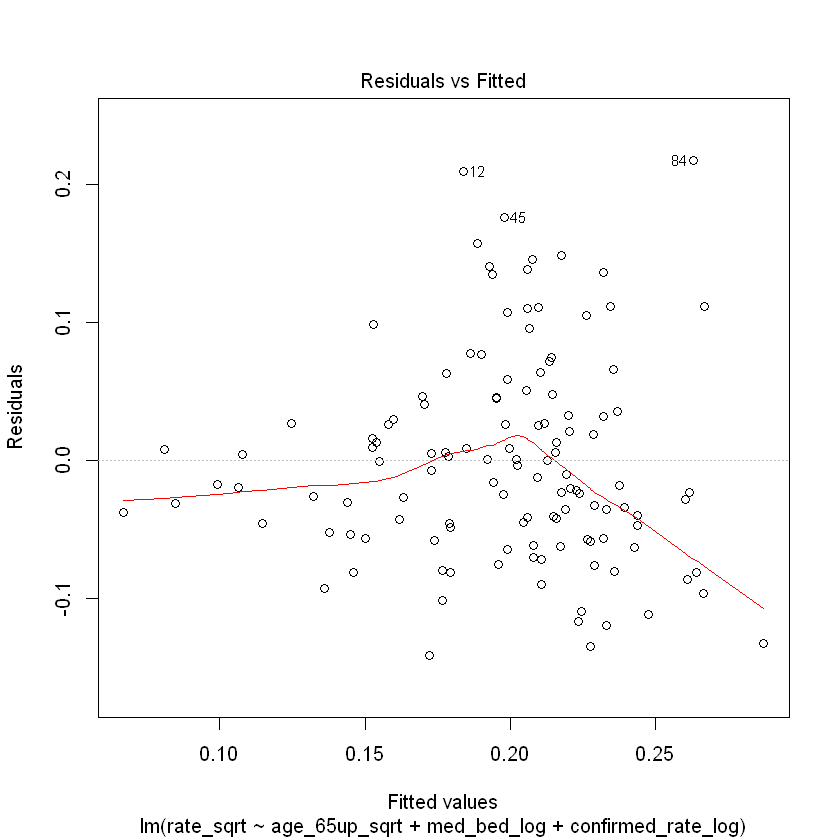

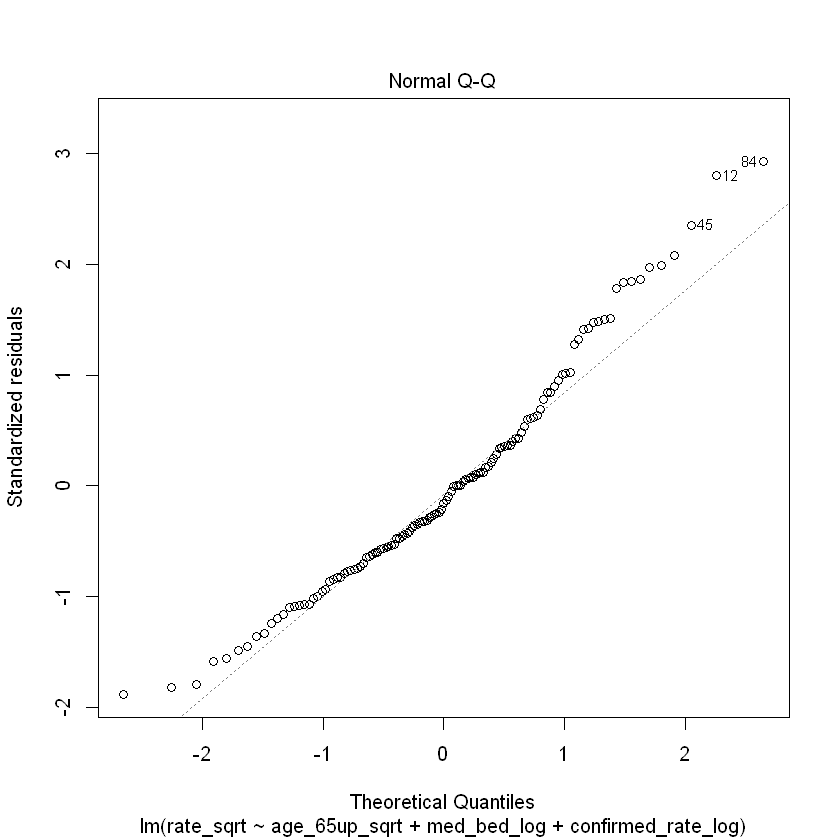

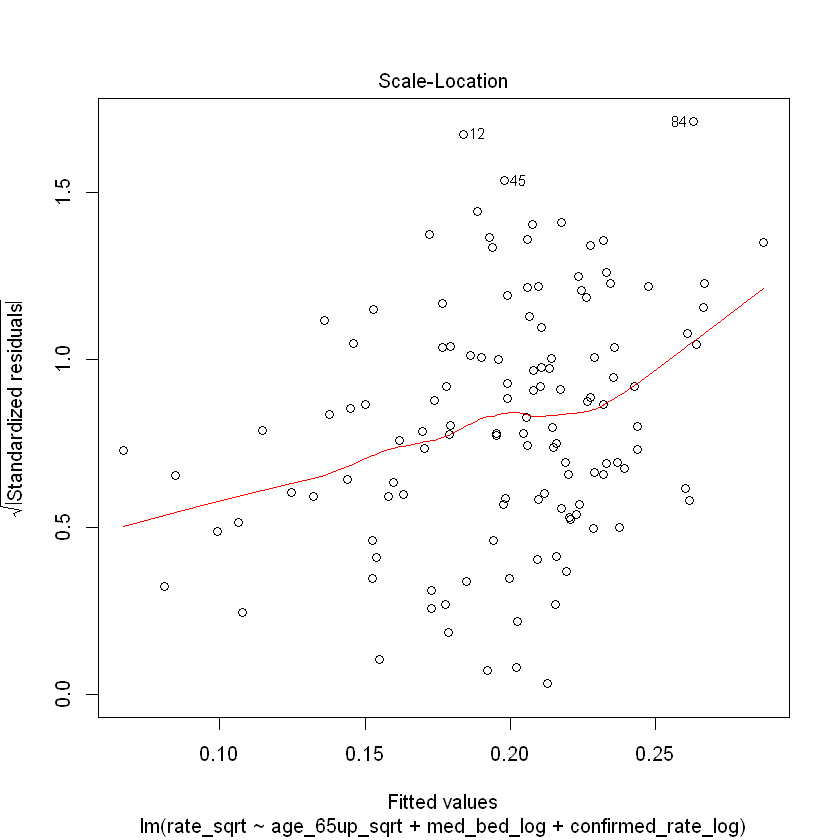

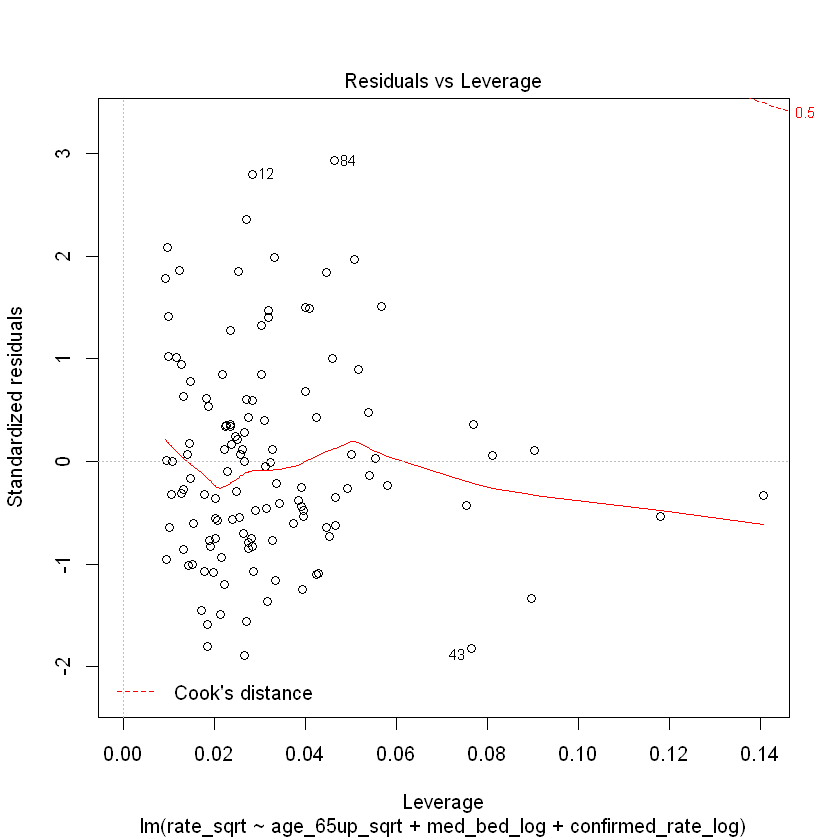

In [85]:
plot(fit_7)

[1] 0.3838384

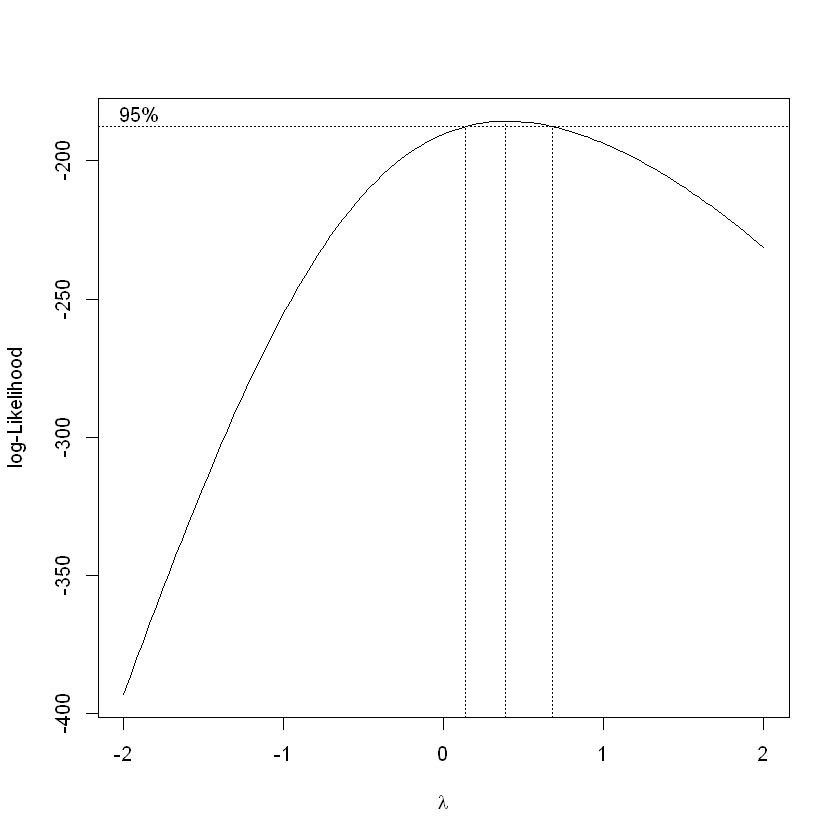

In [86]:
bc = MASS::boxcox(fit_7)
best_lam = bc$x[which(bc$y == max(bc$y))]
best_lam

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.07162423,0.060590968,1.182094,2.394862e-01,2.394862e-01,FALSE
age_65up_sqrt,0.06945491,0.011180989,6.211876,7.666104e-09,3.066442e-08,TRUE
med_bed_log,-0.04123936,0.013071098,-3.155004,2.025168e-03,2.700224e-03,TRUE
confirmed_rate_log,-0.02157625,0.004613288,-4.676980,7.642687e-06,1.528537e-05,TRUE


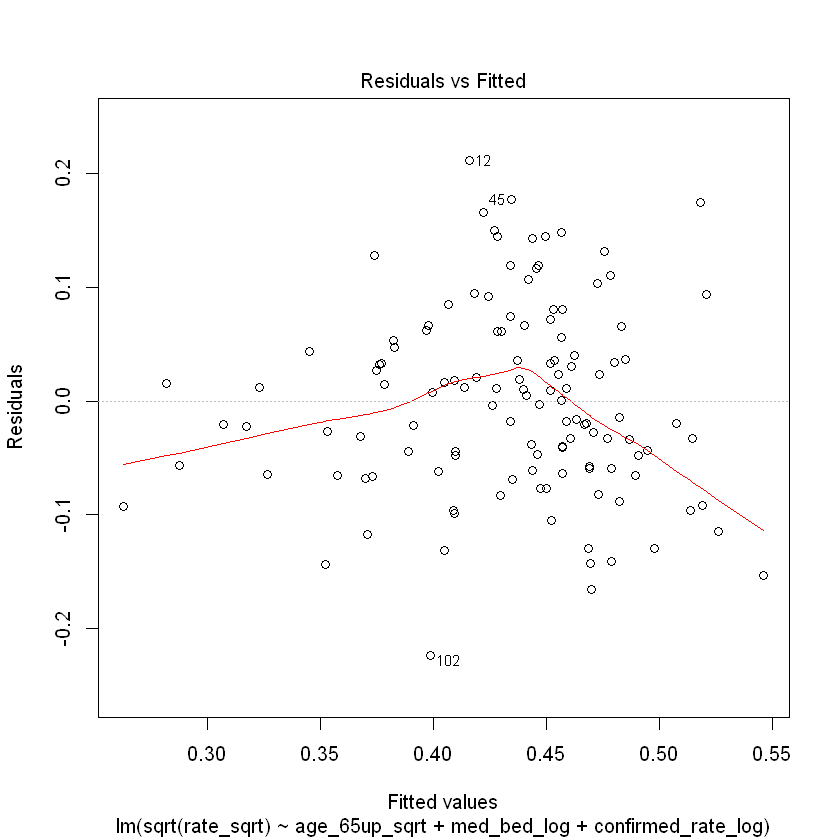

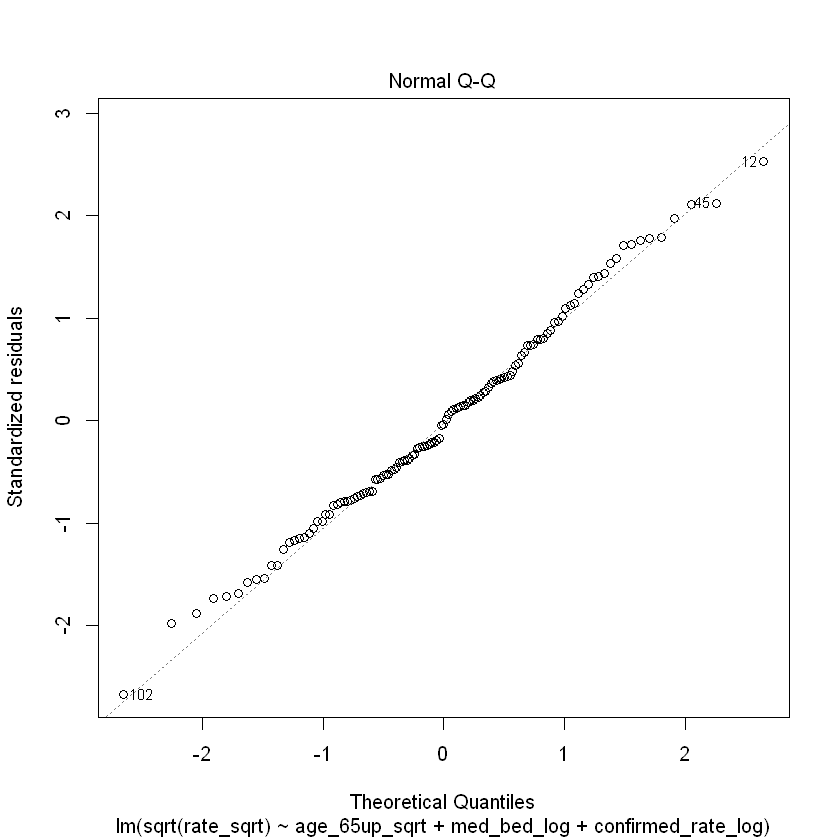

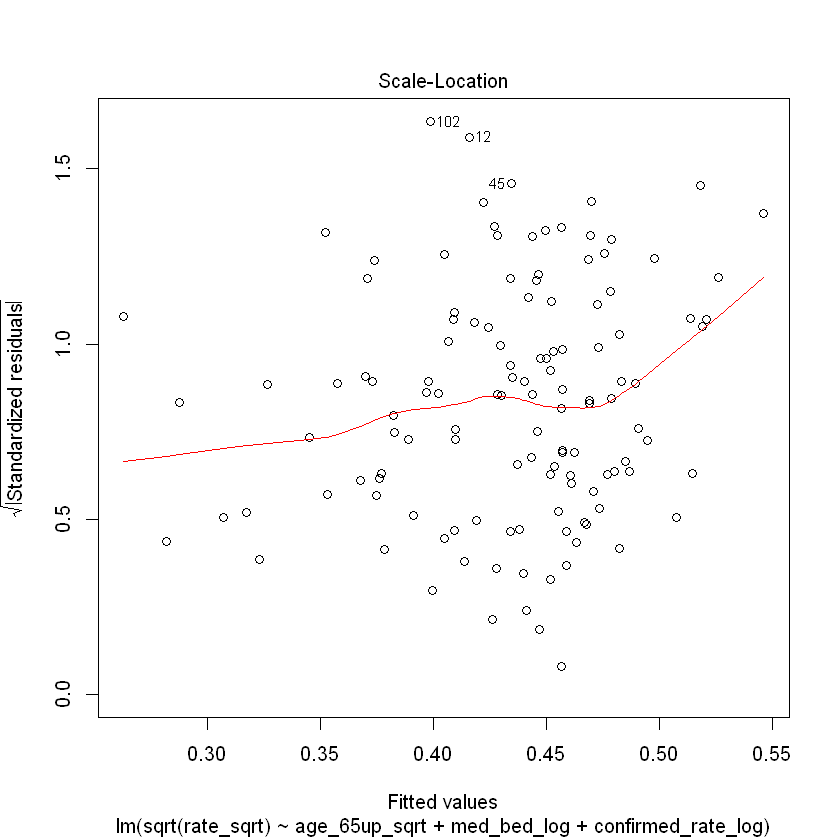

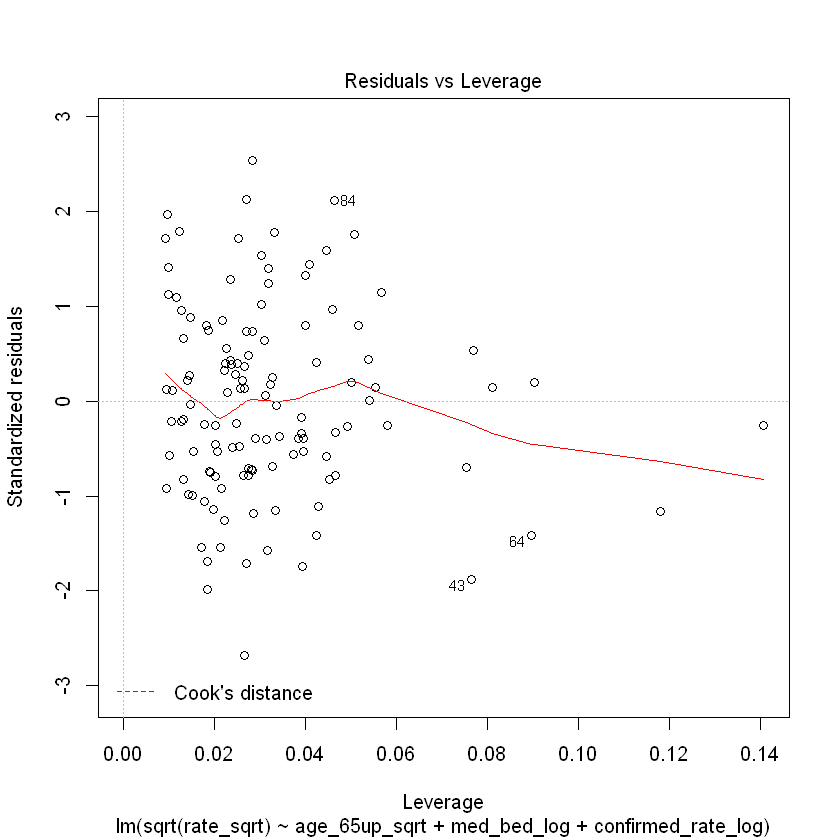

In [93]:
fit_8 <- lm(sqrt(rate_sqrt) ~ age_65up_sqrt + med_bed_log + confirmed_rate_log, df_trans)

analyze_lm(fit_8)

plot(fit_8)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),-0.24868439,0.092672220,-2.683484,8.314934e-03,1.039367e-02,TRUE
age_65up_sqrt,0.19386064,0.030369649,6.383368,3.402373e-09,1.701187e-08,TRUE
confirmed_rate_log,-0.06219908,0.010259808,-6.062402,1.597477e-08,3.993691e-08,TRUE
med_bed_log,-0.02754460,0.012592072,-2.187456,3.064785e-02,3.064785e-02,TRUE
age_65up_sqrt:confirmed_rate_log,0.01694398,0.003884689,4.361733,2.745050e-05,4.575083e-05,TRUE


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121,0.8691003,NA,NA,NA,NA
120,0.7501690,1,0.1189313,19.02472,2.74505e-05


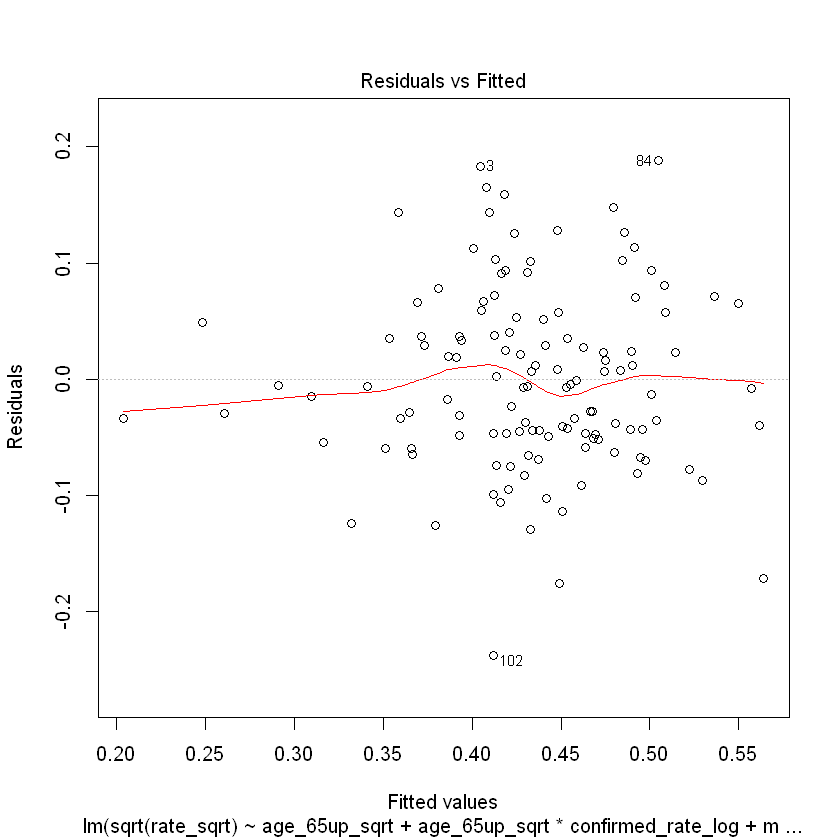

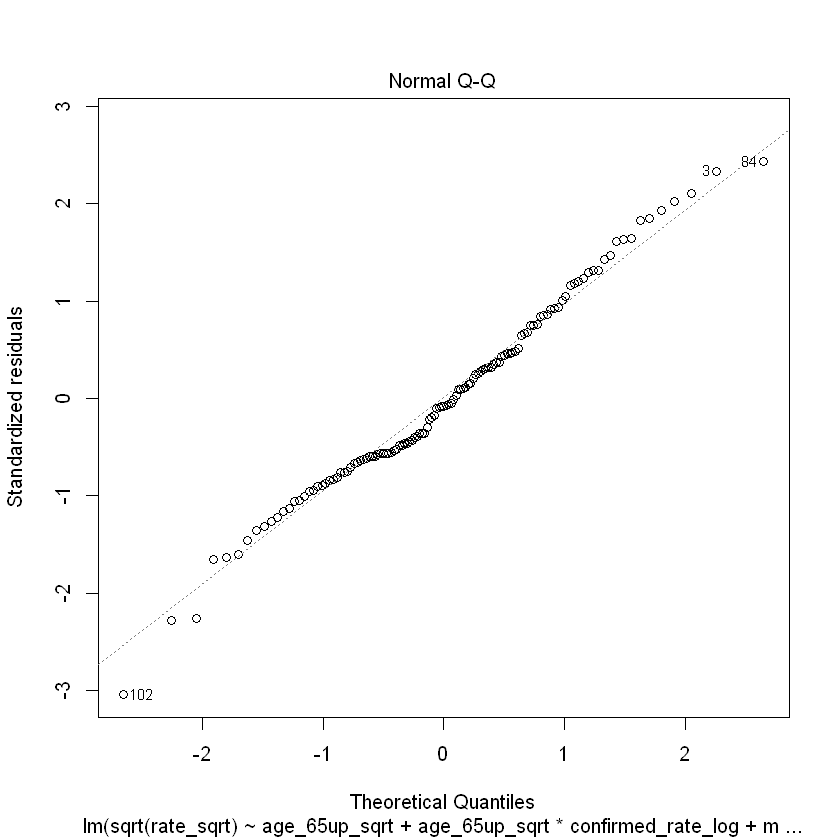

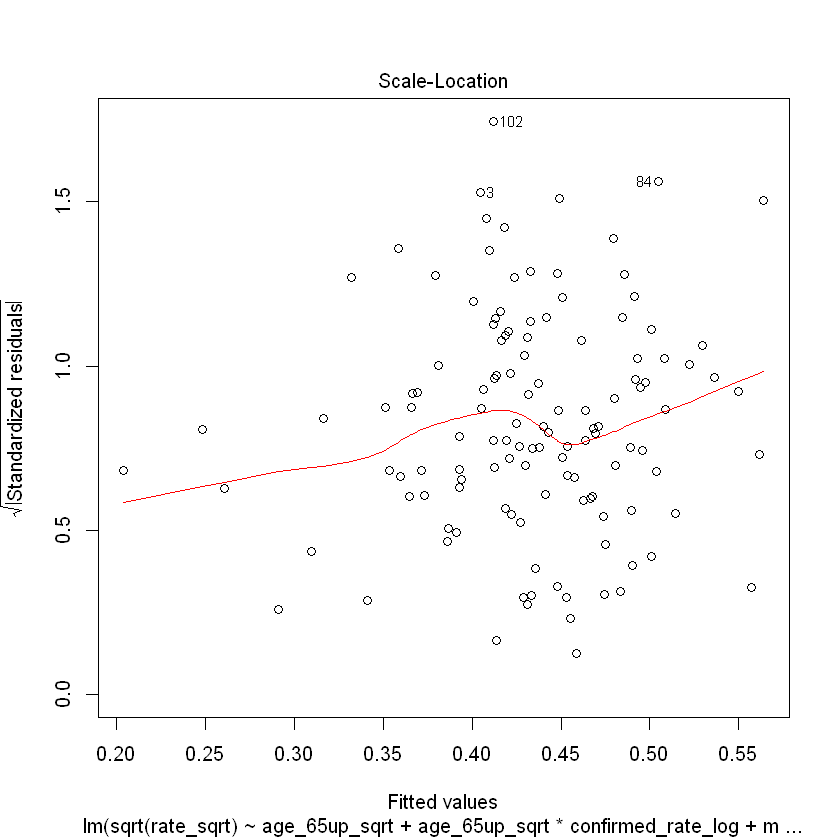

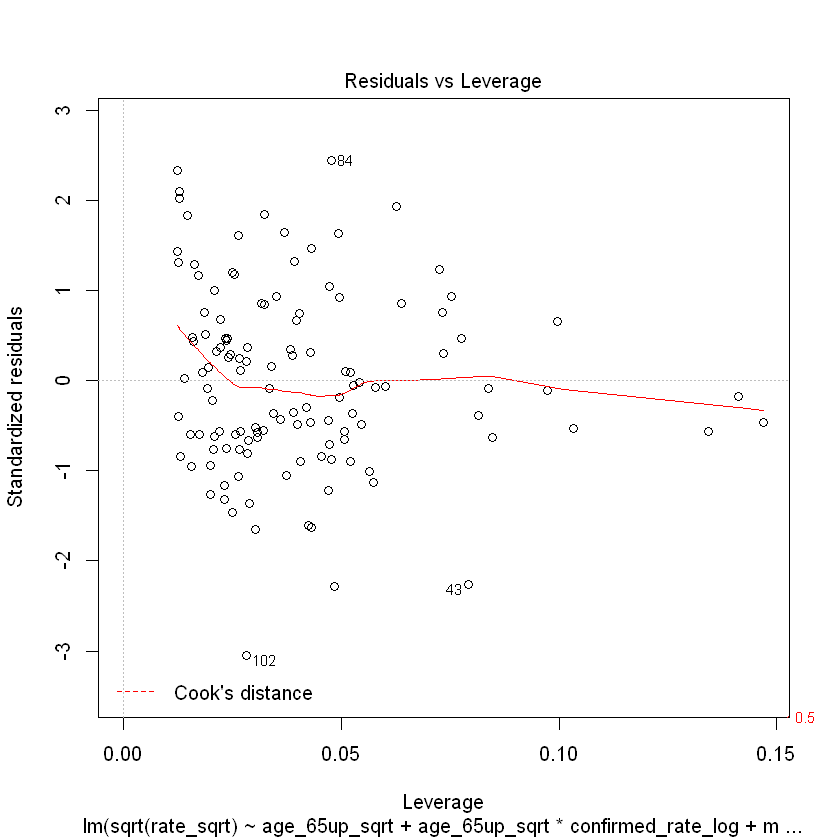

In [94]:
fit_9 <- lm(sqrt(rate_sqrt) ~ age_65up_sqrt +age_65up_sqrt*confirmed_rate_log + 
                med_bed_log + confirmed_rate_log, df_trans)

analyze_lm(fit_9)

anova(fit_8, fit_9)

plot(fit_9)

In [244]:
df_cp_2 <- df_cp %>%
    filter(rate != 0) %>%
    mutate(rate_sqrt = sqrt(rate),
           age_65up_sqrt = sqrt(age_65up),
           med_bed_log = log(med_bed),
           )
fit <- lm(rate^0.25 ~ sqrt(age_65up) + log(med_bed), df_cp)

In [245]:
fit %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.21888224,0.03929393,5.570382,1.354592e-07
sqrt(age_65up),0.07832135,0.01608053,4.870570,3.108905e-06
log(med_bed),-0.05975826,0.01921090,-3.110643,2.284709e-03


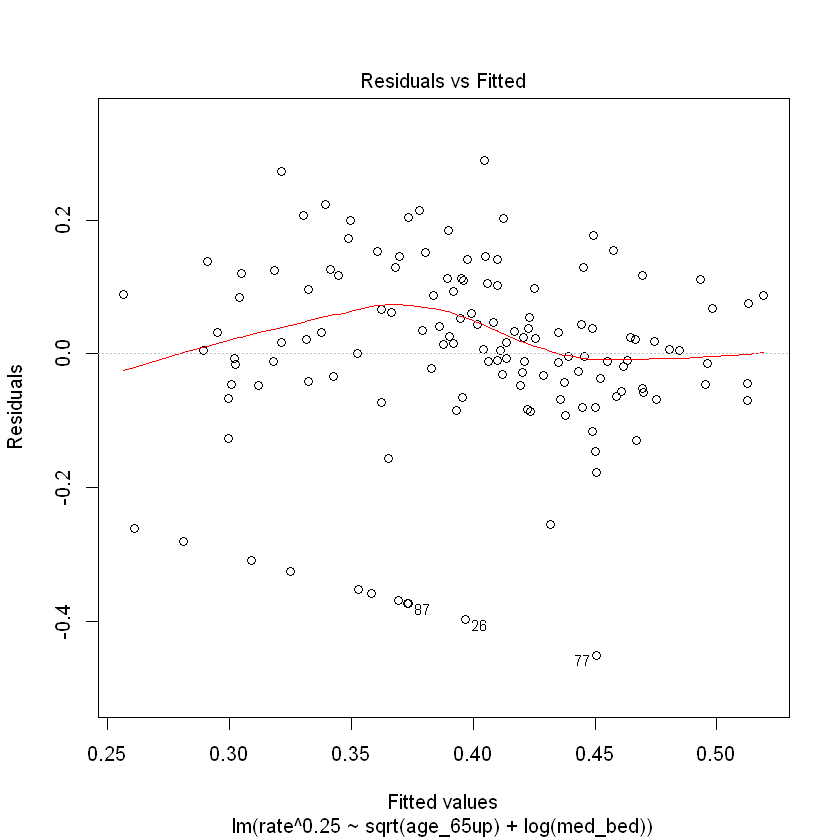

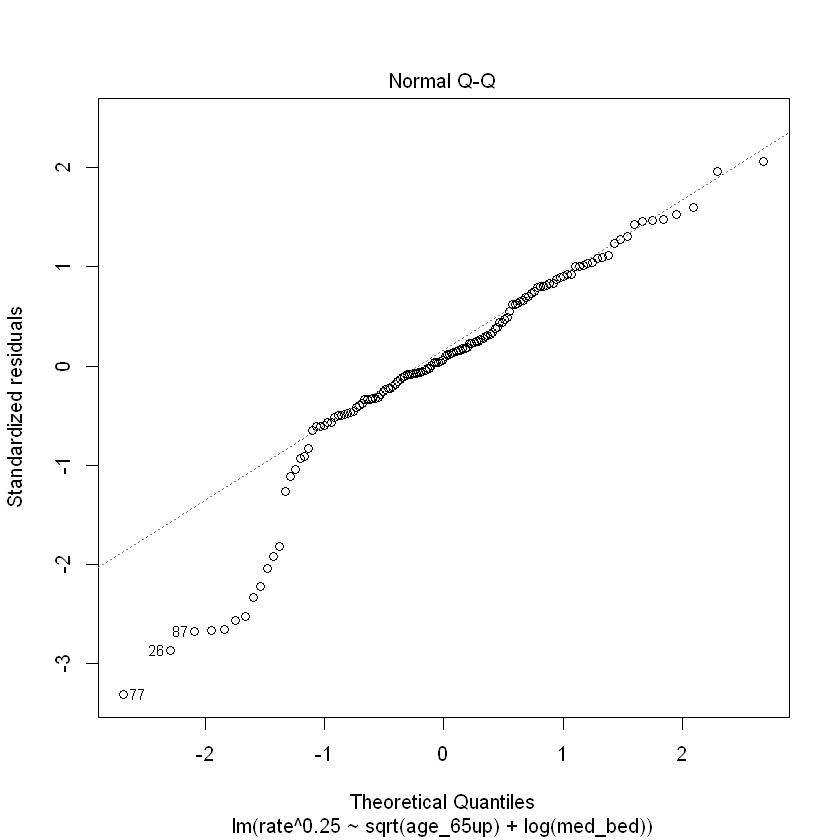

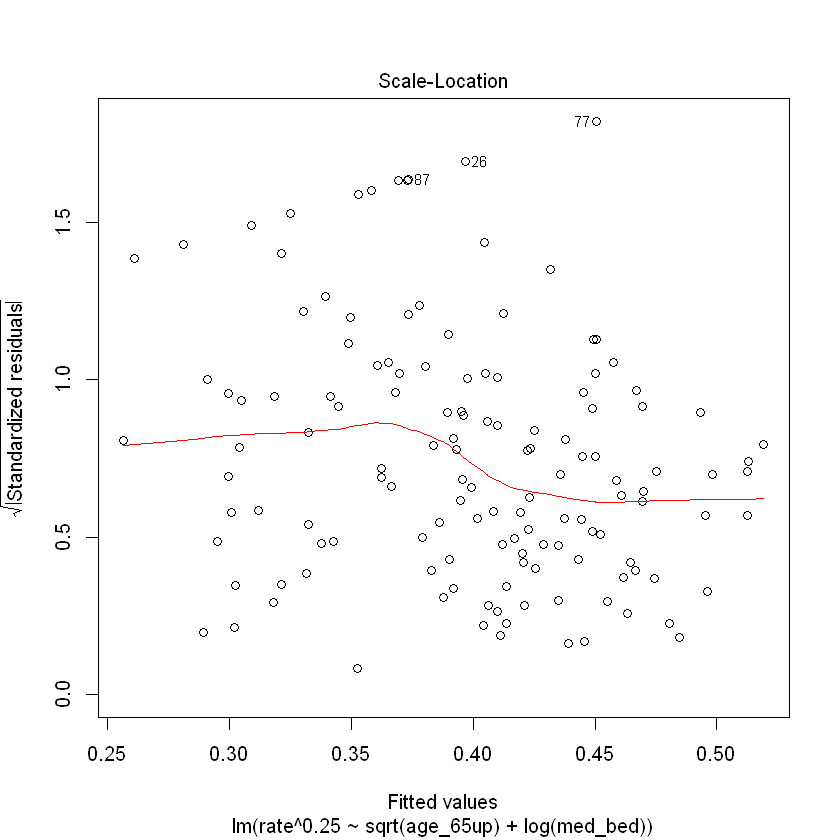

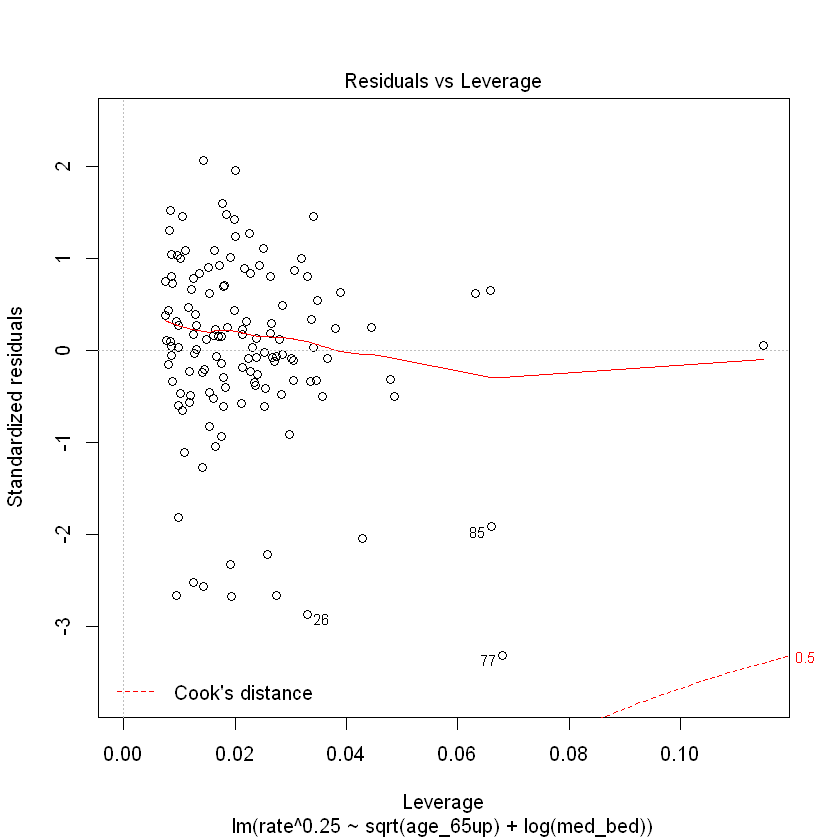

In [246]:
plot(fit)

#### II. Stratified analysis

In [109]:
head(df_sub)

,rate,age_65up,med_bed,pop_density,nurses_midwives,confirmed_rate,gov_resp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.03347035,2.584927,0.5,56.937760,0.3200,4.581358e-05,73.55
2,0.03804348,13.744736,2.9,104.612263,3.5998,2.567702e-04,88.36
3,0.12283196,6.362497,1.9,17.730075,2.2400,8.328513e-05,82.42
5,0.07407407,2.216374,0.8,24.713052,1.3123,8.763456e-07,86.77
6,0.04921309,11.117789,5.0,16.258510,2.5800,8.996617e-05,90.21
7,0.01234935,15.656475,3.8,3.249129,12.6612,2.690263e-04,68.26


In [113]:
med_bed_bin <- cut(df_sub$med_bed, breaks = c(0, quantile(df_sub$med_bed, (1:3)/4), Inf))
summary(med_bed_bin)

(0,1.3]  (1.3,2.3] (2.3,4.01] (4.01,Inf] 
        38         31         32         34

In [114]:
pop_density_bin <- cut(df_sub$pop_density, breaks = c(0, quantile(df_sub$pop_density, (1:3)/4), Inf))
summary(pop_density_bin)

(0,30.5] (30.5,84.6]  (84.6,177]   (177,Inf] 
         34          34          33          34

In [115]:
nurses_midwives_bin <- cut(df_sub$nurses_midwives, breaks = c(0, quantile(df_sub$nurses_midwives, (1:3)/4), Inf))
summary(nurses_midwives_bin)

(0,1.15] (1.15,2.64] (2.64,6.62]  (6.62,Inf] 
         34          34          33          34

In [116]:
confirmed_rate_bin <- cut(df_sub$confirmed_rate, breaks = c(0, quantile(df_sub$confirmed_rate, (1:3)/4), Inf))
summary(confirmed_rate_bin)

(0,3.17e-05] (3.17e-05,0.000123] (0.000123,0.000766]      (0.000766,Inf] 
                 34                  34                  33                  34

In [117]:
gov_resp_bin <- cut(df_sub$gov_resp, breaks = c(0, quantile(df_sub$gov_resp, (1:3)/4), Inf))
summary(gov_resp_bin)

(0,74.9] (74.9,82.9] (82.9,91.1]  (91.1,Inf] 
         34          34          33          34

In [120]:
df_bin <- tibble(med_bed_bin = med_bed_bin,
                 pop_density_bin = pop_density_bin,
                 nurses_midwives_bin = nurses_midwives_bin,
                 confirmed_rate_bin = confirmed_rate_bin,
                 gov_resp_bin = gov_resp_bin)
df_bin$age_65up <- df_sub$age_65up
df_bin$rate <- df_sub$rate
head(df_bin)

med_bed_bin,pop_density_bin,nurses_midwives_bin,confirmed_rate_bin,gov_resp_bin,age_65up,rate
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
"(0,1.3]","(30.5,84.6]","(0,1.15]","(3.17e-05,0.000123]","(0,74.9]",2.584927,0.03347035
"(2.3,4.01]","(84.6,177]","(2.64,6.62]","(0.000123,0.000766]","(82.9,91.1]",13.744736,0.03804348
"(1.3,2.3]","(0,30.5]","(1.15,2.64]","(3.17e-05,0.000123]","(74.9,82.9]",6.362497,0.12283196
"(0,1.3]","(0,30.5]","(1.15,2.64]","(0,3.17e-05]","(82.9,91.1]",2.216374,0.07407407
"(4.01,Inf]","(0,30.5]","(1.15,2.64]","(3.17e-05,0.000123]","(82.9,91.1]",11.117789,0.04921309
"(2.3,4.01]","(0,30.5]","(6.62,Inf]","(0.000123,0.000766]","(0,74.9]",15.656475,0.01234935


In [124]:
sum(!is.na(df_sub$rate))

[1] 135

In [142]:

df_bin %>%
    group_by(med_bed_bin, pop_density_bin, 
             nurses_midwives_bin, confirmed_rate_bin, 
             gov_resp_bin) %>%
    summarize(coef = lm(rate ~ age_65up, .)$coefficients[2])

med_bed_bin,pop_density_bin,nurses_midwives_bin,confirmed_rate_bin,gov_resp_bin,coef
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
"(0,1.3]","(0,30.5]","(0,1.15]","(0,3.17e-05]","(0,74.9]",0.001214216
"(0,1.3]","(0,30.5]","(0,1.15]","(0,3.17e-05]","(74.9,82.9]",0.001214216
"(0,1.3]","(0,30.5]","(0,1.15]","(3.17e-05,0.000123]","(82.9,91.1]",0.001214216
"(0,1.3]","(0,30.5]","(1.15,2.64]","(0,3.17e-05]","(82.9,91.1]",0.001214216
"(0,1.3]","(0,30.5]","(1.15,2.64]","(3.17e-05,0.000123]","(0,74.9]",0.001214216
"(0,1.3]","(0,30.5]","(1.15,2.64]","(3.17e-05,0.000123]","(91.1,Inf]",0.001214216
"(0,1.3]","(30.5,84.6]","(0,1.15]","(0,3.17e-05]","(0,74.9]",0.001214216
"(0,1.3]","(30.5,84.6]","(0,1.15]","(0,3.17e-05]","(74.9,82.9]",0.001214216
"(0,1.3]","(30.5,84.6]","(0,1.15]","(0,3.17e-05]","(82.9,91.1]",0.001214216


In [141]:
# add med_bed and gov_resp to the base model
fit <- lm(rate ~ age_65up + med_bed_bin, df_bin)

fit$coefficients[2]

age_65up 
0.003129075

In [132]:
lm_se <- function(df) {
    df %>% lm()
}

# check strata properties
n_strata <- apply(df_bin, 1:5, sum)
# est_strata.or <- apply(df_bin, 3:5, logOR.est)
# se_strata <- apply(df_bin, 3:5, logOR.se)

# sort(se.strata)

ERROR: Error in if (d2 == 0L) {: missing value where TRUE/FALSE needed


In [133]:
tb <- tibble(a = c(1,2, 3,4),
             b = c(-1, -2, -3, -4),
             c = c(1, 2,3 ,4))
apply(tb, 2:3, print)

ERROR: Error in if (d2 == 0L) {: missing value where TRUE/FALSE needed


## 8. Summary and conclusions
